In [1487]:
%matplotlib inline
from datetime import datetime
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model as lm
from datetime import datetime
import json
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from scipy.stats import boxcox
import seaborn as sns
!pip install category_encoders
import category_encoders as ce
from sklearn.neighbors import KNeighborsClassifier

# Aplikácia predspracovania 

Pripravíme si metódu apply kde vykonáme všetky úpravy ktoré sme vykonali v predchádzajúcej fáze

In [1488]:
data = pd.read_csv("other_train.csv", sep=',',index_col=0)
pdata = pd.read_csv("personal_train.csv", sep=',',index_col=0)
pdata.head()

,name,address,age,sex,date_of_birth
0,Edith Boudreaux,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",61.0,F,1957-04-25
1,Terry Terry,"PSC 4657, Box 5446\nAPO AP 58412",52.0,M,1965-12-12
2,Janet Washington,Unit 9759 Box 9470\nDPO AP 45549,NaN,F,1989-09-08
3,Stephen Lalk,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",36.0,M,1982/01/08
4,Margaret Chabot,"995 Frank Stravenue\nSouth Matthewport, TX 81402",??,F,64-06-23


In [1489]:
data = pd.merge(data, pdata, on=['name', 'address'])
data = data.drop_duplicates(subset=['name','address'], keep='first')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2286
Data columns (total 37 columns):
name                  2237 non-null object
address               2237 non-null object
FTI measured          2231 non-null object
education             2234 non-null object
lithium               2234 non-null object
TT4                   2081 non-null float64
T4U                   2001 non-null float64
capital-loss          2232 non-null float64
capital-gain          2232 non-null float64
on thyroxine          2235 non-null object
tumor                 2232 non-null object
TSH                   2002 non-null float64
T3                    1767 non-null float64
fnlwgt                2236 non-null float64
hours-per-week        2234 non-null float64
relationship          2235 non-null object
thyroid surgery       2236 non-null object
workclass             2231 non-null object
I131 treatment        2235 non-null object
class                 2232 non-null object
marital-status        223

In [1490]:
def apply(data):
   
    
    data['age'] = data['age'].replace(regex=r'[^\d.]+', value=np.nan)
    data['sex'] = data['sex'].replace(['?'], np.nan)           
    data['age']=data['age'].astype(float)
    data['FTI measured']=data['FTI measured'].replace(regex=r'[.\d]+',value='')
    data['education']=data['education'].replace(regex=r'_',value='-')
    data['lithium']=data['lithium'].replace(regex=r'[.\d]+',value='')
    data['tumor']=data['tumor'].replace(regex=r'[.\d]+',value='')
    data['thyroid surgery'] = data['thyroid surgery'].replace(regex=r'[.\d]+',value='')
    data['workclass'] = data['workclass'].replace([' ?'], np.nan)
    data['I131 treatment'] = data['I131 treatment'].replace(regex=r'[.\d]+',value='')
    data['class']=data['class'].str.split('.', expand=True)[0]
    data['class'] = data['class'].replace(['negative'], 'Negative')
    data['class'] = data['class'].replace(['increased binding protein'], 'Increased binding protein')
    data['class'] = data['class'].replace(['decreased binding protein'], 'Decreased binding protein')
    data['goitre'] = data['goitre'].replace(regex=r'[.\d]+',value='')
    data['native-country'] = data['native-country'].replace([' ?'], np.nan)
    data['hypopituitary'] = data['hypopituitary'].replace(regex=r'[.\d]+',value='')
    data['query on thyroxine'] = data['query on thyroxine'].replace(regex=r'[.\d]+',value='')
    data['query on thyroxine'] = data['query on thyroxine'].replace(['F'], 'f')
    data['query on thyroxine'] = data['query on thyroxine'].replace(['FALSE'], 'f')
    data['query on thyroxine'] = data['query on thyroxine'].replace(['T'], 't')
    data['medical_info'].dropna(axis=0, how='all', inplace= True)
    medical_info = pd.DataFrame(list(map(lambda x: json.loads(x.replace("'", "\"")), data['medical_info'])))
    data = pd.concat([data,medical_info], axis=1, join_axes=[data.index])
    data = data.drop(['medical_info'],1)
    data['T3 measured'] = data['T3 measured'].replace(regex=r'[.\d]+',value='')
    data['occupation'] = data['occupation'].replace([' ?'], np.nan)
    data=data.drop(['TBG measured'],axis=1)
    data=data.drop(['TBG'],axis=1)
    data=data.drop(['hypopituitary'],axis=1)
    data['pregnant'] = data['pregnant'].replace(regex=r'[.\d]+',value='')
    data['FTI'] = data['FTI'].replace('?', np.nan)
    data['FTI'] = data['FTI'].astype(float)
    data['T4U measured']=data['T4U measured'].replace(regex=r'[.\d]+',value='')
    data['TT4 measured']=data['TT4 measured'].replace(regex=r'[.\d]+',value='')
    data['on antithyroid medication']=data['on antithyroid medication'].replace(regex=r'[.\d]+',value='')
    data['psych']=data['psych'].replace(regex=r'[.\d]+',value='')
    data['query hyperthyroid']=data['query hyperthyroid'].replace(regex=r'[.\d]+',value='')
    data['query hypothyroid']=data['query hypothyroid'].replace(regex=r'[.\d]+',value='')
    data['sick']=data['sick'].replace(regex=r'[.\d]+',value='')
    data = data.reset_index(drop=True)
    return data

In [1491]:
data = apply(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 42 columns):
name                         2237 non-null object
address                      2237 non-null object
FTI measured                 2231 non-null object
education                    2234 non-null object
lithium                      2234 non-null object
TT4                          2081 non-null float64
T4U                          2001 non-null float64
capital-loss                 2232 non-null float64
capital-gain                 2232 non-null float64
on thyroxine                 2235 non-null object
tumor                        2232 non-null object
TSH                          2002 non-null float64
T3                           1767 non-null float64
fnlwgt                       2236 non-null float64
hours-per-week               2234 non-null float64
relationship                 2235 non-null object
thyroid surgery              2236 non-null object
workclass                    2090 n

Ako vidíme spojenie a odstránenie duplikátov prebehlo úspešne.

In [1492]:
data.describe()

,TT4,T4U,capital-loss,capital-gain,TSH,T3,fnlwgt,hours-per-week,education-num,age,FTI
count,2081.000000,2001.000000,2232.000000,2232.000000,2002.000000,1767.000000,2.236000e+03,2234.000000,2233.000000,1815.000000,1954.000000
mean,109.368765,0.996329,-254.028226,1031.577061,4.507190,2.023656,1.877688e+05,38.714414,10.018809,51.816529,111.449795
std,35.800926,0.191376,13861.618399,7346.989985,20.343302,0.815050,1.037374e+05,12.046294,2.529858,21.325145,33.508740
min,2.000000,0.310000,-254700.000000,0.000000,0.005000,0.050000,1.228500e+04,2.000000,1.000000,1.000000,2.000000
25%,88.000000,0.880000,0.000000,0.000000,0.442500,1.600000,1.182140e+05,35.000000,9.000000,36.000000,93.000000
50%,104.000000,0.980000,0.000000,0.000000,1.400000,2.000000,1.771420e+05,40.000000,10.000000,54.000000,107.000000
75%,125.000000,1.080000,0.000000,0.000000,2.600000,2.400000,2.340752e+05,40.000000,12.000000,67.000000,125.000000
max,430.000000,2.120000,200200.000000,99999.000000,478.000000,10.600000,1.366120e+06,99.000000,16.000000,455.000000,395.000000


# Tvorba percentilov a nahrádzanie outlierov

In [1493]:
def percentily(array,dolper,horper):
    dole=np.percentile(array, dolper)
    hore=np.percentile(array, horper)

    print(dole)
    print(hore)

    array= np.where(array<=dole,dole,array)
    array= np.where(array>=hore,hore,array)
   

    return array,dole,hore

V tejto metóde nahradzujeme vychýlené hodnoty smerom nahor a nadol. Vstupné parametre dolper a horper určujú hranice percentilov. Hodnoty väčšie ako je horper percentil nahradzujeme tou hodnotou percentila. Analogicky to funguje aj pri dolnej hranici. Metóda vracia upravené hodnoty v poli. Vo výpise nám vypíše dolný a horný percentil.

# KNN

In [1494]:
def knn(predict,train):

  array=np.array(predict)

  aa=predict.isnull()
  nan_mask=np.array(aa)
  not_nan_mask = ~nan_mask

  arrayage=np.array(train)

  arrayagetrain= arrayage[not_nan_mask]
  arraytrain= array[not_nan_mask]

  arrayagetrain= arrayagetrain.reshape(1,-1).transpose()
  arraytrain= arraytrain.reshape(1,-1).transpose()


  arrayagepredict= arrayage[nan_mask]
  arrayagepredict=arrayagepredict.reshape(1,-1).transpose()

  neigh = KNeighborsClassifier(n_neighbors=5)

  neigh.fit(arrayagetrain, arraytrain) 

  a=neigh.predict(arrayagepredict)

  j=0
  for i in range(len(nan_mask)):
    if(nan_mask[i]): 
      array[i]=a[j]
      j=j+1
  
 
  return array,neigh

Metóda nahradzovania NaN hodnôt pomocou algoritmu KNN. Túto techniku používame najmä pre kategorické atribúty.

# Lineárna Regresia

In [1495]:
def lin_regresia(array,column):
    regr = lm.LinearRegression()
    nanarr=np.isnan(array)
    notnanarr = ~nanarr
    arrayage=np.array(column)
    
    arrayagetrain= arrayage[notnanarr]
    arraytrain= array[notnanarr]

    arrayagetrain= arrayagetrain.reshape(1,-1).transpose()
    arraytrain= arraytrain.reshape(1,-1).transpose()

    arrayagepredict= arrayage[nanarr]
    arrayagepredict=arrayagepredict.reshape(1,-1).transpose()
    
    regr.fit(arrayagetrain, arraytrain)

    a = regr.predict(arrayagepredict)
  
    j=0
    for i in range(len(array)):
        if(np.isnan(array[i])): 
            array[i]=a[j]
            j=j+1
  
    return array,regr
  

Metóda na nahradzovanie chýbajúcich hodnôt pomocou lineárnej regresie. Funkcia vracia natrenovaný model, aby sme rovnaký model použili na testovacom datasete. Rovnako aj ostatné funkcie vracajú svoje modeli(knn,medián a pod)

# Transformácia

In [1496]:
def transformation(attribute):
    array=np.array(data[attribute])
    not_nan_mask = ~np.isnan(array)
    transformed, att = boxcox(array[not_nan_mask])
   # transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
   # transformed = preprocessing.scale(transformed)
    array[not_nan_mask] = transformed
    transf=pd.Series(array)
    print(transf.isnull().sum())

    _ = plt.figure(figsize=(11,5))
    _ = sns.kdeplot(transf, shade=True)
  
    return transformed, array, att

Transformácia atribútu, ktorý sa posiela ako parameter do metódy. Na transformáciu používame boxcox. Najprv však musíme vybrať len nie NaN hodnoty, aby sme mohli vykonať trasformáciu. Metóda vráti upravené polia s hodnotami NaN a bez. Metóda vypisuje tiež počet NaN hodnôt v atribúte.
Musíme vrátiť takisto atribút, aby sme mohli rovnakú transformáciu vykonať aj na testovacom datasete.

# Výmena hodnôt NaN

Metóda na výmenu chýbajúcich hodnôt mediánom. Vracia nám pole s nahradenými NaN hodnotami.

Metóda na výmenu chýbajúcich hodnôt mediánom segmentu. Vracia nám pole s upravenými hodnotami. Ako segmenty využívame atribút sex

In [1497]:
def vymenananmedian(transformed,array):
    median =np.median(transformed)
    print(median)
    mask = np.isnan(array)
    array= np.where(mask ,median,array)
    transf=pd.Series(array)
    plt.figure(figsize=(10,5))
    sns.kdeplot(transf, shade=True)
  
    return array,median

In [1498]:
def vymenananmediansegmentu(transformed,array):
  
    median =np.median(transformed)
    df= pd.DataFrame(array)

    df2=pd.concat([df,data['sex']],axis=1, join_axes=[df.index])
    df2.columns = ['value', 'sex']
  
    medianseg = df2.groupby('sex').aggregate('median')
    medianseg['value']['Unknown']=median

    df2.loc[df2['value'].isnull() & df2['sex'].str.contains('F'),'value'] = medianseg.at['F','value']
    df2.loc[df2['value'].isnull() & df2['sex'].str.contains('M'),'value'] = medianseg.at['M','value']
    #df2.loc[df2['value'].isnull() & df2['sex'].str.contains('Unknown'),'value'] = medianseg.at['Unknown','value']
  
    print(df2['value'].isnull().sum())
    array= np.array(df2['value'])
    
    return array,medianseg

# Predspracovanie dát

## Feature 'name'

In [1499]:
data['name'].describe()

count             2237
unique            2236
top       Terry Murphy
freq                 2
Name: name, dtype: object

In [1500]:
data['name'].value_counts(dropna=False).head(3)

Terry Murphy       2
Sandra Allen       1
Albert Belanger    1
Name: name, dtype: int64

In [1501]:
data.loc[data['name'] == 'Terry Murphy']

,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,query on thyroxine,T3 measured,referral source,education-num,occupation,race,pregnant,age,sex,date_of_birth,FTI,T4U measured,TSH measured,TT4 measured,on antithyroid medication,psych,query hyperthyroid,query hypothyroid,sick
1207,Terry Murphy,"7667 Johnny Lakes\nFoxborough, AZ 05256",t,Some-college,f,118.0,0.96,0.0,0.0,f,f,1.3,1.8,180296.0,40.0,Unmarried,f,Private,f,Negative,Divorced,f,United-States,f,t,other,10.0,Adm-clerical,White,f,NaN,F,1996-08-25,72.0,t,t,t,f,f,f,f,f
1775,Terry Murphy,"PSC 2301, Box 2752\nAPO AP 17795",t,HS-grad,f,107.0,0.94,0.0,0.0,f,f,0.5,2.2,201328.0,50.0,Husband,f,Private,f,Negative,Married-civ-spouse,f,United-States,f,t,SVHC,9.0,Transport-moving,White,f,28.0,M,14/06/1990,110.0,t,t,t,f,f,f,f,f


Ponechali sme človeka, ktorý má rovnaké meno ale inú adresu, iný dátum narodenia vek atď.

## Feature 'address'

In [1502]:
data['address'].describe()

count                                                  2237
unique                                                 2237
top       64577 Bradley Pike Suite 940\nSouth Samuel, AL...
freq                                                      1
Name: address, dtype: object

Máme všetky unikátne adresy, v tomto atribúte nevidíme problém.

## Feature 'fnlwgt'

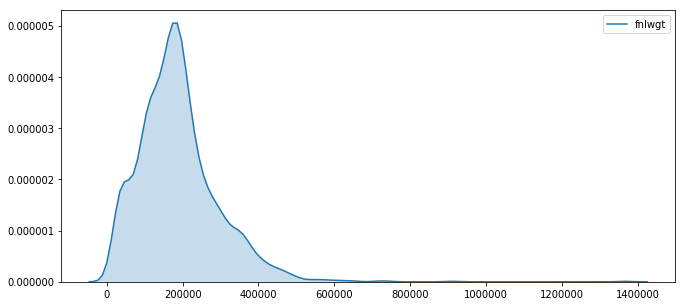

In [1503]:
plt.figure(figsize=(11,5))
sns.kdeplot(data['fnlwgt'].dropna(), shade=True);

1


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


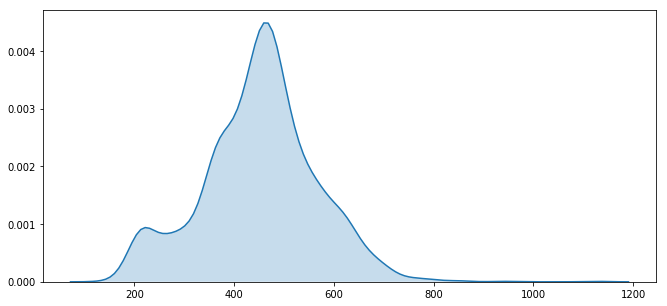

In [1504]:
transformed_fnlwgt, array_fnlwgt,attfnlwgt = transformation('fnlwgt')

456.5907969728518


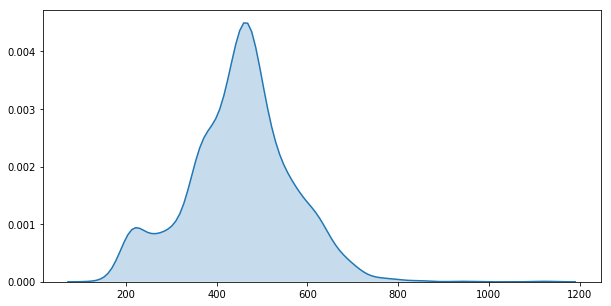

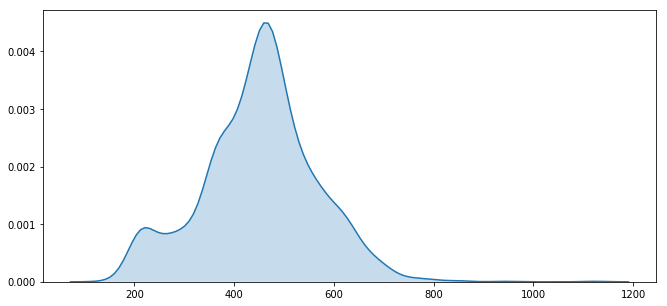

In [1505]:
array_fnlwgt,median_fnlwgt=vymenananmedian(transformed_fnlwgt,array_fnlwgt)
plt.figure(figsize=(11,5))
sns.kdeplot(array_fnlwgt, shade=True)

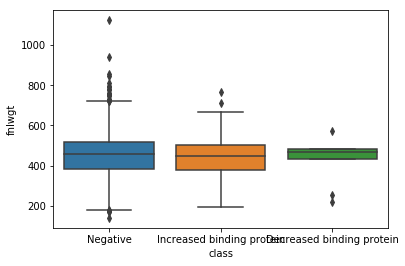

In [1506]:
data['fnlwgt']=pd.DataFrame(array_fnlwgt)
sns.boxplot(x="class", y="fnlwgt", data=data)

In [1507]:
 array_fnlwgt,minfnlwgt,maxfnlwgt = percentily(array_fnlwgt,5,95)

229.93524054655433
635.3713928989689


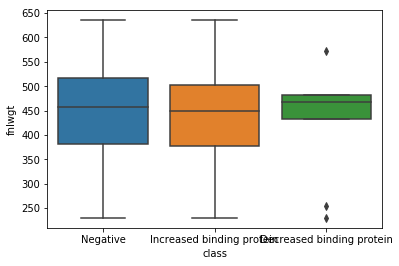

In [1508]:
data['fnlwgt']=pd.DataFrame(array_fnlwgt)
sns.boxplot(x="class", y="fnlwgt", data=data)

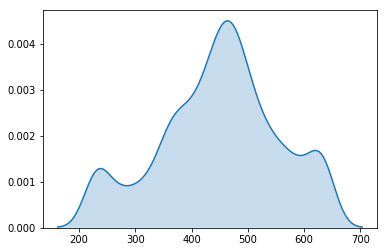

In [1509]:
sns.kdeplot(array_fnlwgt, shade=True);

## Feature 'age'

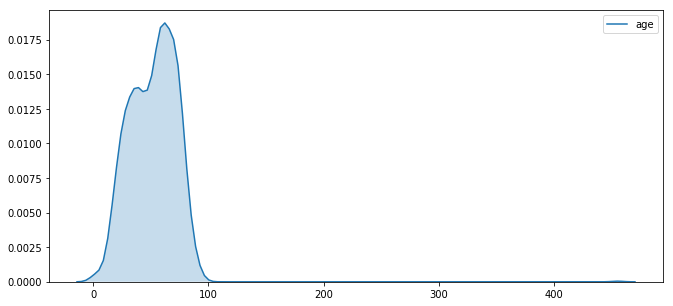

In [1510]:
plt.figure(figsize=(11,5))
sns.kdeplot(data['age'].dropna(), shade=True);

422


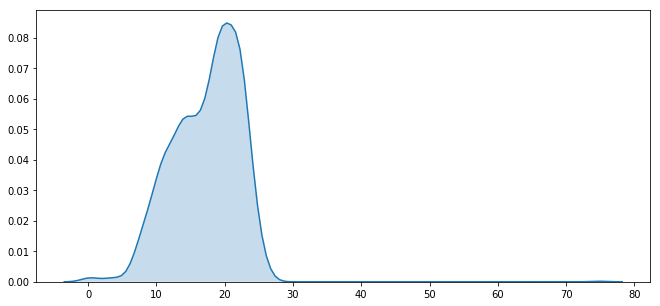

In [1511]:
data['age']=data['age'].astype(float)
transformed_age, array_age, attage = transformation('age')

In [1512]:

array_age,lr_age = lin_regresia(array_age,data['fnlwgt'])

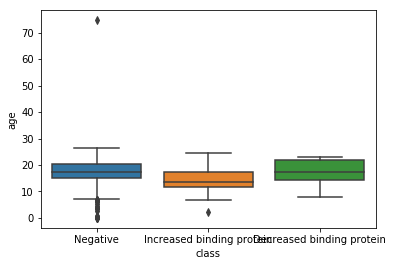

In [1513]:
data['age']=pd.DataFrame(array_age)
sns.boxplot(x="class", y="age", data=data)

In [1514]:
 array_age,minage,maxage = percentily(array_age,5,95)

9.28587547401523
23.373761065594838


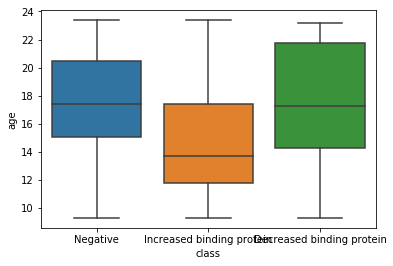

In [1515]:
data['age']=pd.DataFrame(array_age)
sns.boxplot(x="class", y="age", data=data)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


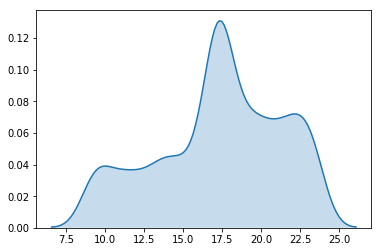

In [1516]:
sns.kdeplot(array_age, shade=True);

Takto opravené pole vrátime do pôvodného dataframe.

## TODO: Feature 'FTI'

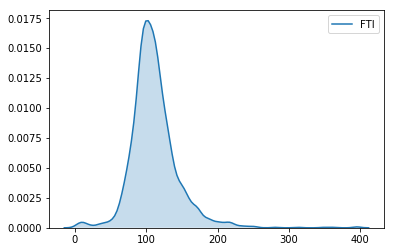

In [1517]:
sns.kdeplot(data['FTI'].dropna(), shade=True);

283


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


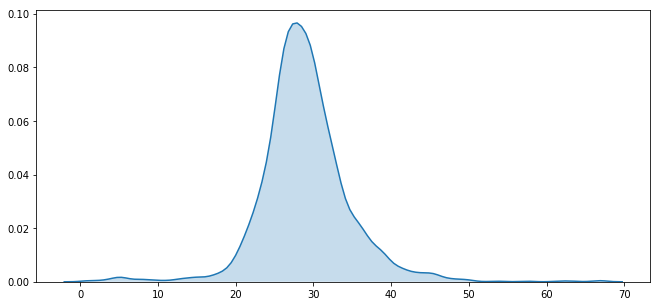

In [1518]:
transformed_FTI,array_FTI,attFTI = transformation('FTI')

In [1519]:
array_FTI,lr_FTI=lin_regresia(array_FTI,data['age'])

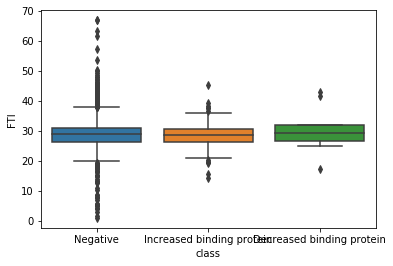

In [1520]:
data['FTI']=pd.DataFrame(array_FTI)
sns.boxplot(x="class", y="FTI", data=data)

In [1521]:
array_FTI,minFTI,maxFTI = percentily(array_FTI,5,93)

21.845383045262963
36.375935711923965


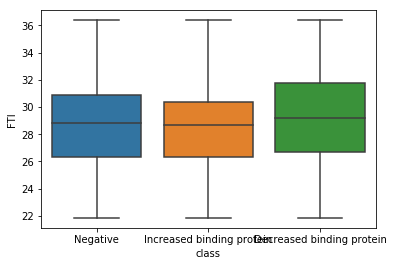

In [1522]:
data['FTI']=pd.DataFrame(array_FTI)
sns.boxplot(x="class", y="FTI", data=data)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


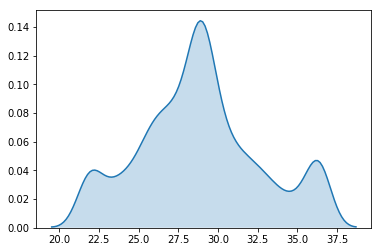

In [1523]:
sns.kdeplot(array_FTI, shade=True);

##  Feature 'date_of_birth'

Feature date_of_birth sme neupravovali ďalej nakoľko máme atribút age ktorý nám poskytuje dostatok informácii k veku jednotlivých jedincov.

## Feature 'FTI measured'

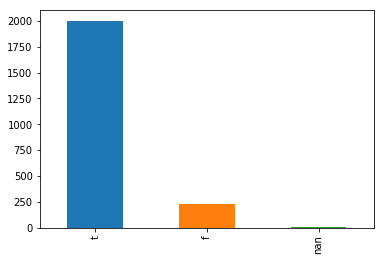

In [1524]:
data['FTI measured'].value_counts(dropna=False).plot(kind='bar')

In [1525]:
data['FTI measured'] = data['FTI measured'].replace(np.nan, 'Unknown')

In [1526]:
data['FTI measured'].value_counts()

t          1999
f           232
Unknown       6
Name: FTI measured, dtype: int64

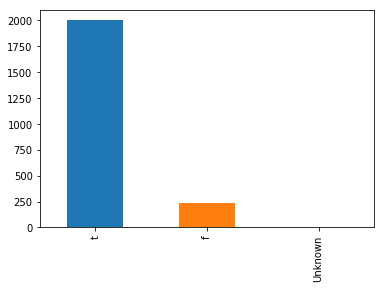

In [1527]:
data['FTI measured'].value_counts(dropna=False).plot(kind='bar')

Mali sme 6 hodnôt NaN, ktoré sme nahradili novým atríbútom Unknown

## Feature 'sex'

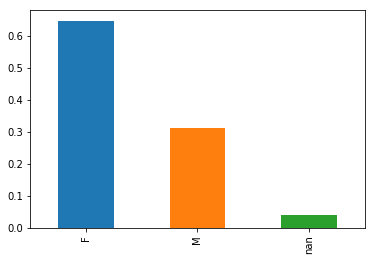

In [1528]:
(data['sex'].value_counts(dropna=False) / len(data)).plot(kind='bar')

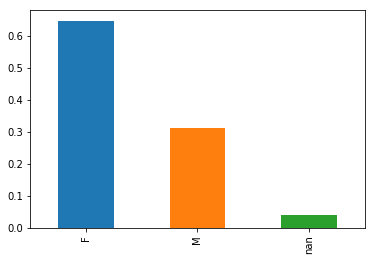

In [1529]:
(data['sex'].value_counts(dropna=False) / len(data)).plot(kind='bar')

In [1530]:
array_sex,knnsex= knn(data['sex'],data['FTI'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


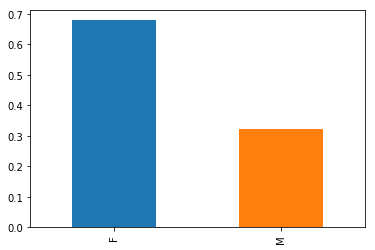

In [1531]:
r=pd.Series(array_sex)
(r.value_counts(dropna=False) / len(r)).plot(kind='bar')

In [1532]:
data['sex']=pd.DataFrame(array_sex)


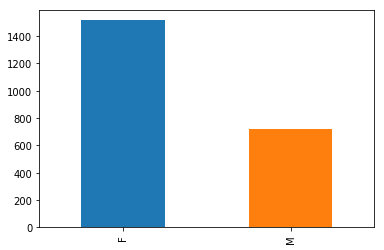

In [1533]:
data['sex'].value_counts(dropna=False).plot(kind='bar')

## Feature 'education'

In [1534]:
data['education'].value_counts(dropna=False)

 HS-grad         729
 Some-college    512
 Bachelors       356
 Masters         127
 11th             85
 Assoc-voc        82
 10th             77
 Assoc-acdm       76
 7th-8th          44
 9th              38
 Prof-school      28
 12th             27
 Doctorate        22
 5th-6th          15
 1st-4th          12
 Preschool         4
NaN                3
Name: education, dtype: int64

Mali sme 3 hodnty NaN, ktoré sme nahradili novým atríbútom Unknown

In [1535]:
array_education,knneducation= knn(data['education'],data['FTI'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [1536]:
data['education']=pd.DataFrame(array_education)

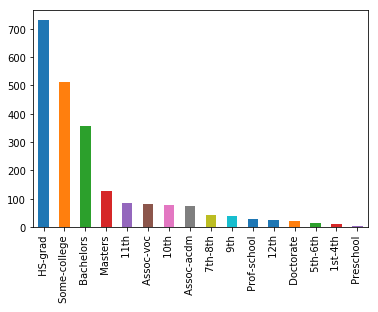

In [1537]:
data['education'].value_counts(dropna=False).plot(kind='bar')

## Feature 'lithium'

In [1538]:
data['lithium'].value_counts(dropna=False)

f      2223
t        11
NaN       3
Name: lithium, dtype: int64

Mali sme 3 hodnty NaN, ktoré sme nahradili novým atríbútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


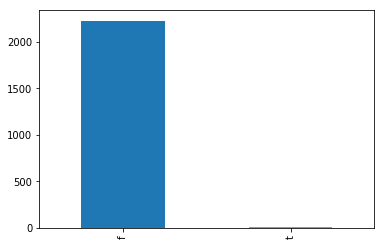

In [1539]:
array_lithium,knnlithium= knn(data['lithium'],data['FTI'])
data['lithium']=pd.DataFrame(array_lithium)
data['lithium'].value_counts(dropna=False).plot(kind='bar')

## TODO: Feature 'T3'

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


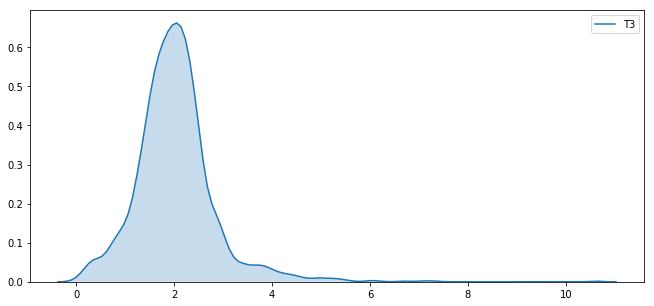

In [1540]:
plt.figure(figsize=(11,5))
sns.kdeplot(data['T3'].dropna(), shade=True);

In [1541]:
 data['T3'].value_counts()

2.00     133
2.20     131
1.80     121
2.10     109
1.90     107
2.30     105
1.60      99
1.70      95
1.50      87
2.40      85
2.50      72
1.40      67
1.30      59
2.60      48
1.20      42
2.90      36
2.80      35
2.70      28
1.10      26
1.00      25
0.90      24
3.00      20
0.80      20
0.70      17
3.10      14
0.30      14
3.40      13
0.40      11
0.60      10
0.50       9
        ... 
3.20       9
3.70       8
3.60       8
4.00       7
0.20       6
3.90       6
3.30       5
4.50       5
4.20       4
4.30       4
3.50       4
4.10       3
5.30       3
5.00       3
5.50       2
0.05       2
4.80       2
4.40       2
0.10       2
7.30       1
4.60       1
6.00       1
4.90       1
6.10       1
10.60      1
7.10       1
6.70       1
5.20       1
4.70       1
5.10       1
Name: T3, Length: 61, dtype: int64

470


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


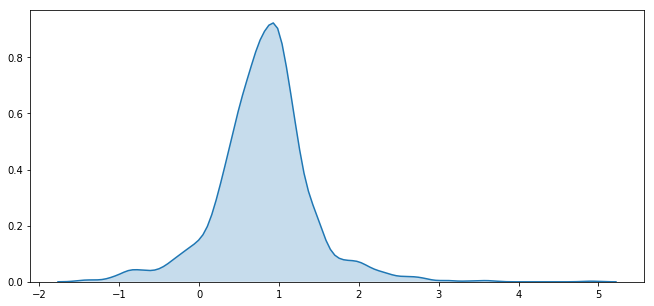

In [1542]:
transformedT3, arrayT3,attT3 = transformation('T3')

In [1543]:
arrayT3,lr_T3=lin_regresia(arrayT3,data['FTI'])

In [1544]:
#array_T3,median_T3=vymenananmedian(transformedT3,arrayT3)
data['T3']=pd.DataFrame(array_T3)

In [1545]:
array_T3,minT3,maxT3 = percentily(array_T3,5,95)

0.19194123349746664
1.5784906191425578


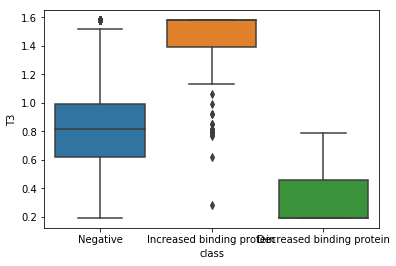

In [1546]:
sns.boxplot(x="class", y="T3", data=data)

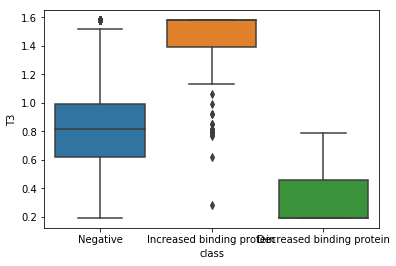

In [1547]:
data['T3']=pd.DataFrame(array_T3)
sns.boxplot(x="class", y="T3", data=data)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


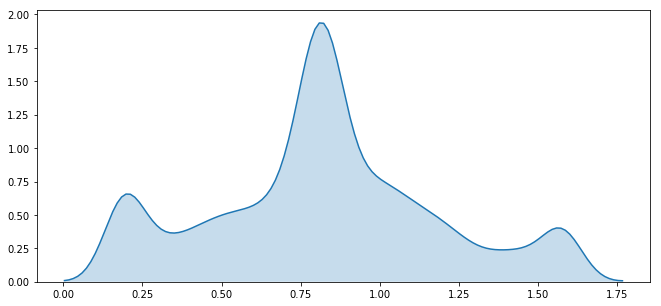

In [1548]:
plt.figure(figsize=(11,5))
sns.kdeplot(array_T3, shade=True)

## TODO: Feature 'TT4'

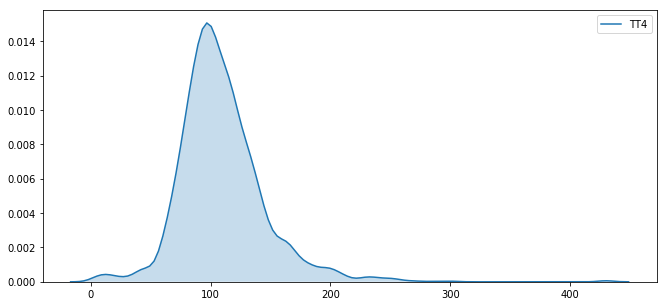

In [1549]:
plt.figure(figsize=(11,5))
sns.kdeplot(data['TT4'].dropna(), shade=True);

156


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


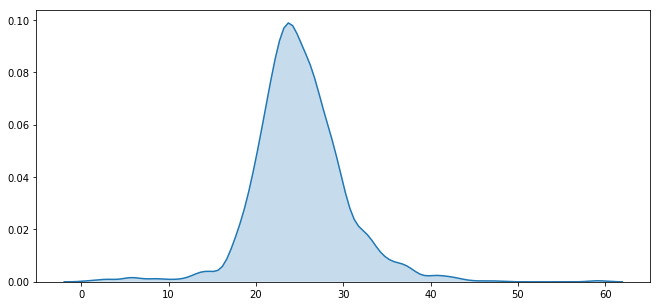

In [1550]:
transformed_TT4,array_TT4,attTT4 = transformation('TT4')

In [1551]:
array_TT4,lr_TT4=lin_regresia(array_TT4,data['T3'])

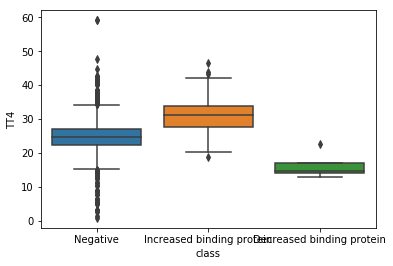

In [1552]:
data['TT4']=pd.DataFrame(array_TT4)
sns.boxplot(x="class", y="TT4", data=data)

In [1553]:
array_TT4,minTT4,maxTT4 = percentily(array_TT4,2,95)

14.702229153438289
33.34288065088401


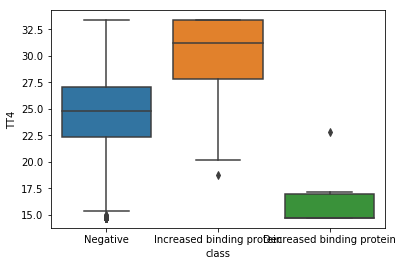

In [1554]:
data['TT4']=pd.DataFrame(array_TT4)
sns.boxplot(x="class", y="TT4", data=data)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


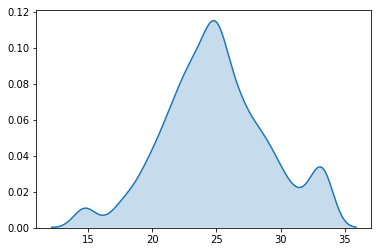

In [1555]:
sns.kdeplot(array_TT4, shade=True);

## TODO: Feature 'T4U'

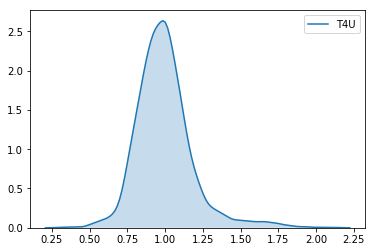

In [1556]:
sns.kdeplot(data['T4U'].dropna(), shade=True);

236


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


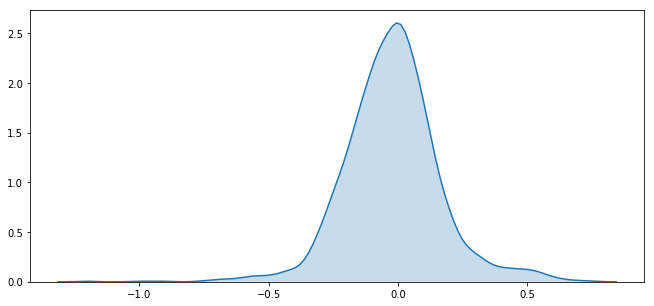

In [1557]:
transformed_T4U,array_T4U,attT4U = transformation('T4U')

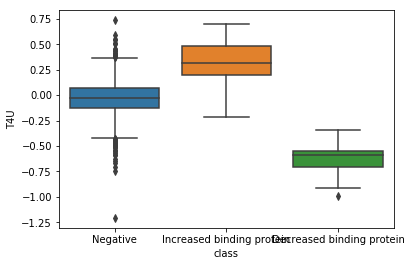

In [1558]:
data['T4U']=pd.DataFrame(array_T4U)
sns.boxplot(x="class", y="T4U", data=data)

In [1559]:

array_T4U,lr_T4U=lin_regresia(array_T4U,data['T3'])

In [1560]:
array_T4U,minT4U,maxT4U = percentily(array_T4U,0,95)

-1.2077719204675312
0.26813057319064554


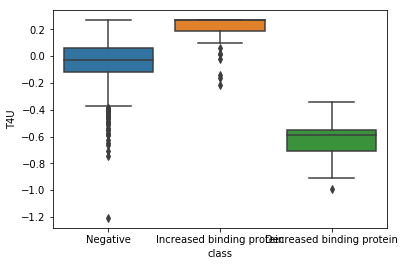

In [1561]:
data['T4U']=pd.DataFrame(array_T4U)
_ = sns.boxplot(x="class", y="T4U", data=data)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


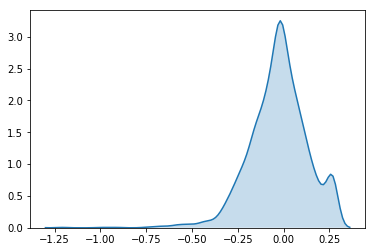

In [1562]:
sns.kdeplot(array_T4U, shade=True);

## Feature 'capital-loss'

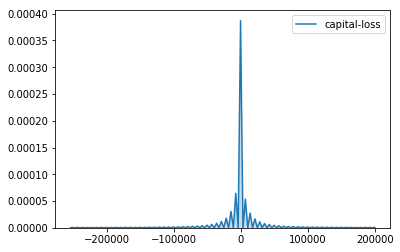

In [1563]:
sns.kdeplot(data['capital-loss'].dropna(), shade=True);

In [1564]:
transformed_capital_loss = np.log(data['capital-loss']+2)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


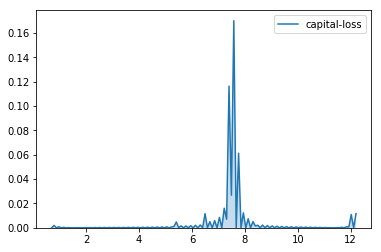

In [1565]:
sns.kdeplot(transformed_capital_loss, shade=True);

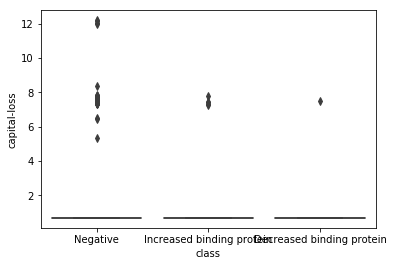

In [1566]:
data['capital-loss']=pd.DataFrame(transformed_capital_loss)
sns.boxplot(x="class", y="capital-loss", data=data)

0.6931471805599453


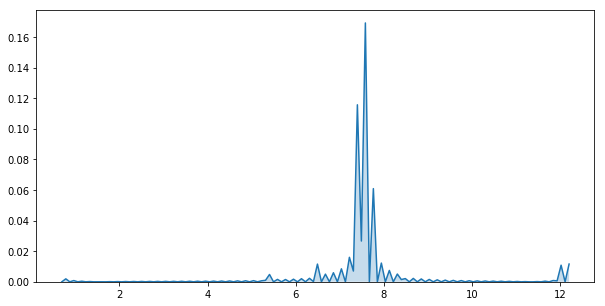

In [1567]:
not_nan_mask = ~np.isnan(transformed_capital_loss)
transformed_capital_loss,mediancapital_loss = vymenananmedian(transformed_capital_loss[not_nan_mask],transformed_capital_loss)

In [1568]:
transformed_capital_loss,mincapital_loss,maxcapital_loss=percentily(transformed_capital_loss,0,99)

0.6931471805599453
7.590346945602565


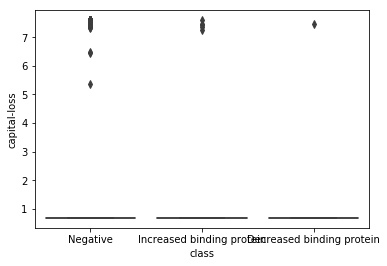

In [1569]:
data['capital-loss']=pd.DataFrame(transformed_capital_loss)
sns.boxplot(x="class", y="capital-loss", data=data)

Transformovaný atríbut capital-loss nám toho veľa nepovedal preto ho neuvažujeme v ďalšej časti.

## Feature capital-gain'

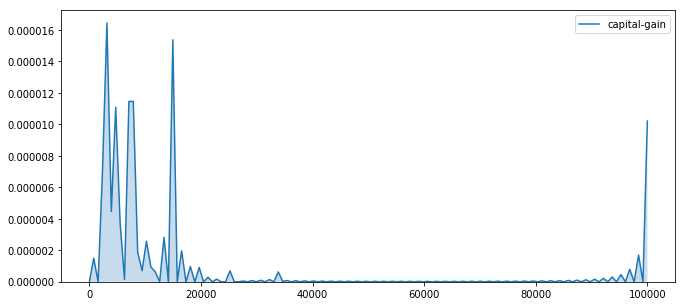

In [1570]:
plt.figure(figsize=(11,5))
sns.kdeplot(data['capital-gain'].dropna(), shade=True);

In [1571]:
transformed_capital_gain = np.log(data['capital-gain']+2)
array_cg = np.array(data['capital-gain'])
array_cg = transformed_capital_gain
not_nan_mask = ~np.isnan(transformed_capital_gain)
transformed_capital_gaint = transformed_capital_gain[not_nan_mask]

0.6931471805599453


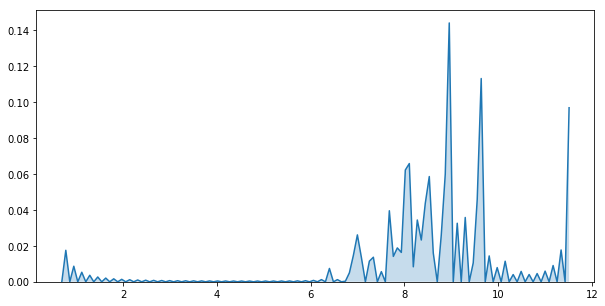

In [1572]:
arraycg,median_cg = vymenananmedian(transformed_capital_gaint,array_cg)

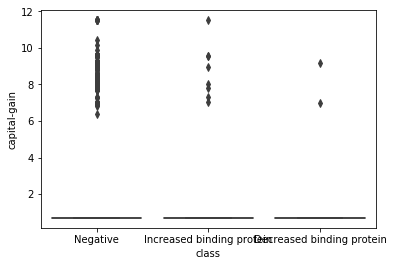

In [1573]:
data['capital-gain']=pd.DataFrame(arraycg)
sns.boxplot(x="class", y="capital-gain", data=data)

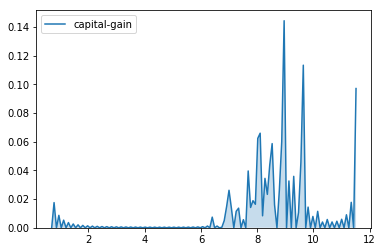

In [1574]:
sns.kdeplot(transformed_capital_gaint, shade=True);

In [1575]:
transformed_capital_gain,mincapital_gain,maxcapital_gain=percentily(arraycg,5,95)

0.6931471805599453
8.445052513638554


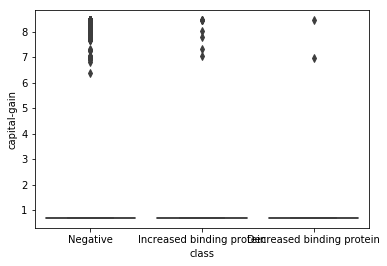

In [1576]:
data['capital-gain']=pd.DataFrame(transformed_capital_gain)
sns.boxplot(x="class", y="capital-gain", data=data)

Transformovaný atríbut capital-gain nám toho veľa nepovedal preto ho neuvažujeme v ďalšej časti.

## Feature 'on thyroxine'

In [1577]:
data['on thyroxine'].value_counts(dropna=False)

f      1972
t       263
NaN       2
Name: on thyroxine, dtype: int64

Mali sme 2 hodnty NaN, ktoré sme nahradili novým atríbútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


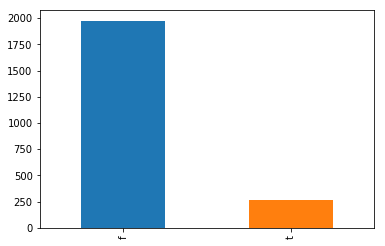

In [1578]:
array_on_thyroxine,knnon_thyroxine= knn(data['on thyroxine'],data['T3'])
data['on thyroxine']=pd.DataFrame(array_on_thyroxine)
data['on thyroxine'].value_counts(dropna=False).plot(kind='bar')

## Feature 'tumor'

In [1579]:
data['tumor'].value_counts(dropna=False)

f      2178
t        54
NaN       5
Name: tumor, dtype: int64

Mali sme 5 hodnôt NaN, ktoré sme nahradili novým atríbútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


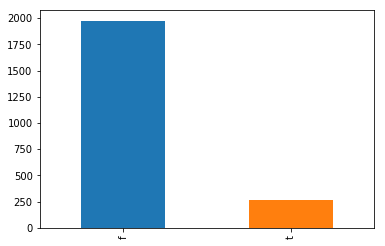

In [1580]:
array_tumor,knntumor= knn(data['tumor'],data['T3'])
data['tumor']=pd.DataFrame(array_on_thyroxine)
data['tumor'].value_counts(dropna=False).plot(kind='bar')

## Feature 'TSH'

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


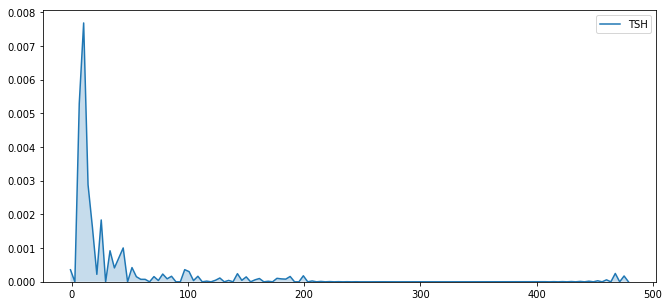

In [1581]:
plt.figure(figsize=(11,5))
sns.kdeplot(data['TSH'].dropna(), shade=True);

235


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


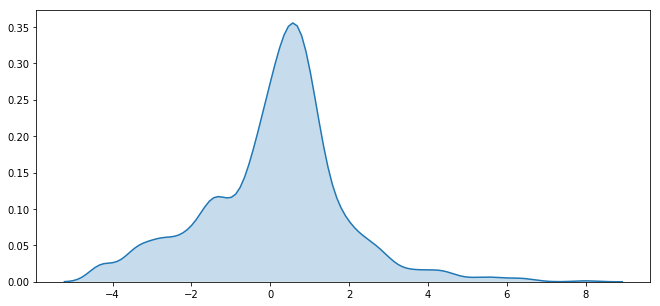

In [1582]:
data['TSH'] = data['TSH'].astype(float)
transformed_TSH, array_TSH,attfnlwgt = transformation('TSH')
array_TSH,lr_TSH = lin_regresia(array_TSH,data['fnlwgt'])


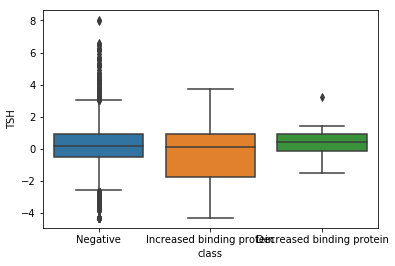

In [1583]:
data['TSH']=pd.DataFrame(array_TSH)
sns.boxplot(x="class", y="TSH", data=data)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


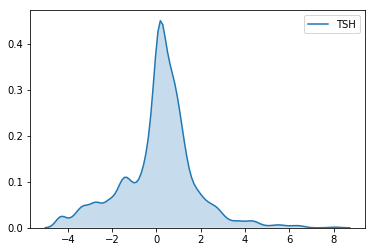

In [1584]:
sns.kdeplot(data['TSH'].dropna(), shade=True);

In [1585]:
array_TSH,minTSH,maxTSH = percentily(array_TSH,5,94)

-3.0507661103300716
2.4791663073337777


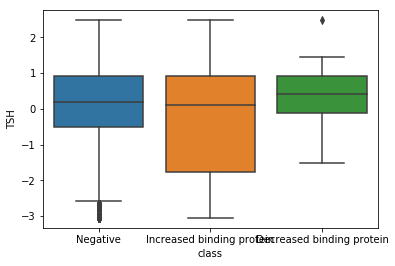

In [1586]:
data['TSH']=pd.DataFrame(array_TSH)
sns.boxplot(x="class", y="TSH", data=data)

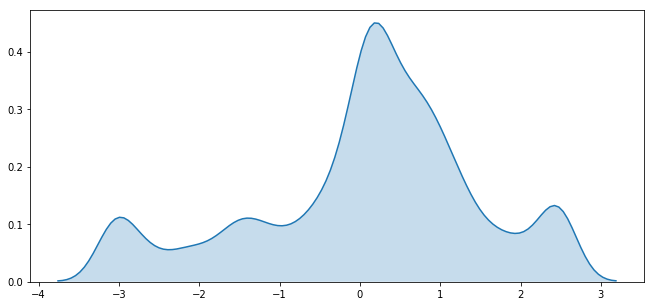

In [1587]:
plt.figure(figsize=(11,5))
sns.kdeplot(array_TSH, shade=True)

## Feature 'hours-per-week'

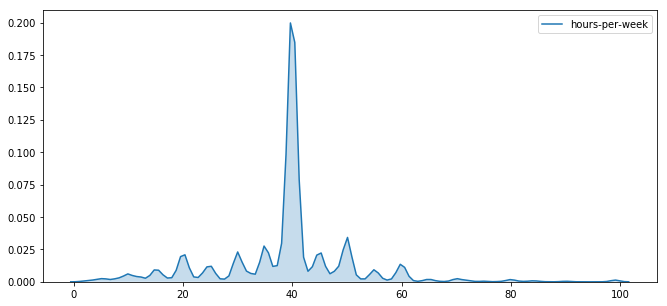

In [1588]:
plt.figure(figsize=(11,5))
sns.kdeplot(data['hours-per-week'].dropna(), shade=True);

3


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


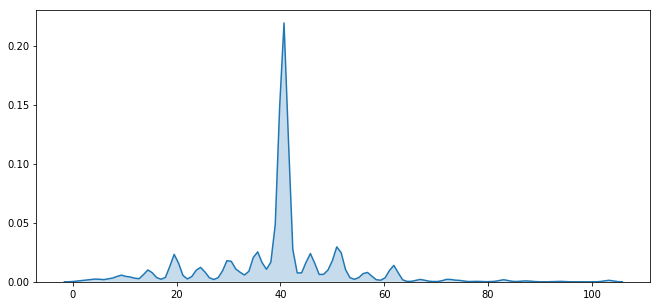

In [1589]:
transformed_hours_per_week, array_hours_per_week,atthours_per_week = transformation('hours-per-week')
data['hours-per-week']=pd.DataFrame(array_hours_per_week)

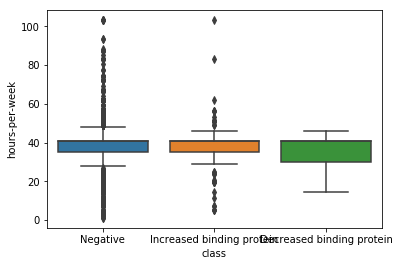

In [1590]:
sns.boxplot(x="class", y="hours-per-week", data=data)

0


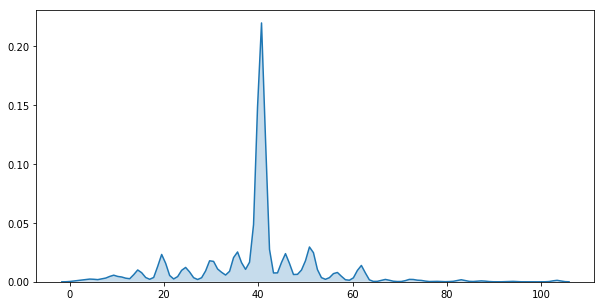

In [1591]:
array_hours_per_week,medianhours_per_week=vymenananmediansegmentu(transformed_hours_per_week,array_hours_per_week)
plt.figure(figsize=(10,5))
sns.kdeplot(array_hours_per_week, shade=True)

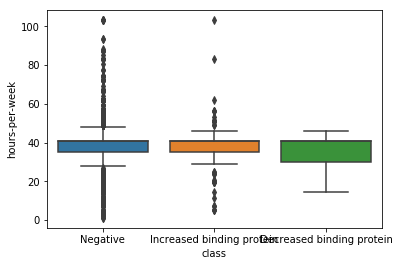

In [1592]:
data['hours-per-week']=pd.DataFrame(array_hours_per_week)
sns.boxplot(x="class", y="hours-per-week", data=data)

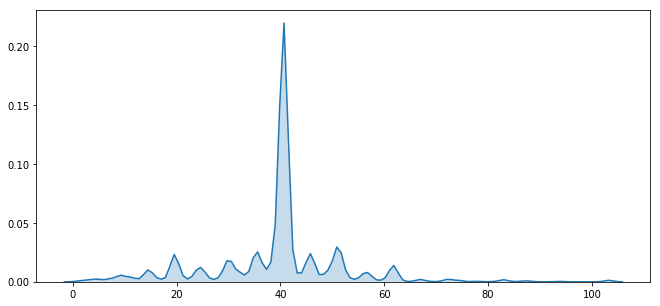

In [1593]:

plt.figure(figsize=(11,5))
sns.kdeplot(array_hours_per_week, shade=True)


In [1594]:
array_hours_per_week,minhours_per_week,maxhours_per_week = percentily(array_hours_per_week,5,95)

14.384500672221385
61.720433640811365


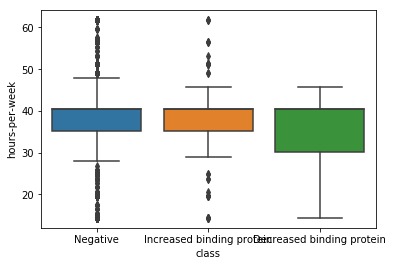

In [1595]:
data['hours-per-week']=pd.DataFrame(array_hours_per_week)
sns.boxplot(x="class", y="hours-per-week", data=data)

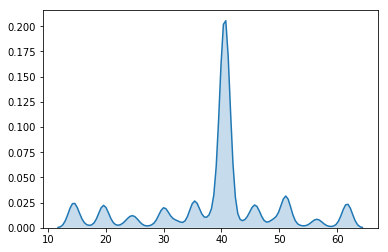

In [1596]:
sns.kdeplot(array_hours_per_week, shade=True);

## Feature 'relationship'

In [1597]:
data['relationship'].value_counts(dropna=False)

 Not-in-family     766
 Husband           472
 Unmarried         390
 Own-child         357
 Wife              184
 Other-relative     66
NaN                  2
Name: relationship, dtype: int64

Mali sme 2 hodnoty NaN, ktoré sme nahradili novým atríbútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


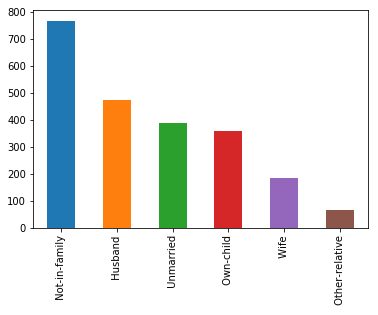

In [1598]:
array_relationship,knnrelationship= knn(data['relationship'],data['T3'])
data['relationship']=pd.DataFrame(array_relationship)
data['relationship'].value_counts(dropna=False).plot(kind='bar')

## Feature 'thyroid surgery'

In [1599]:
data['thyroid surgery'].value_counts(dropna=False)

f      2205
t        31
NaN       1
Name: thyroid surgery, dtype: int64

Mali sme 1 hodnotu NaN, ktoré sme nahradili novým atríbútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


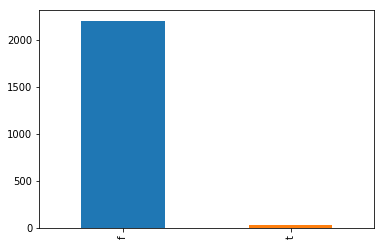

In [1600]:
array_thyroid_surgery,knnthyroid_surgery= knn(data['thyroid surgery'],data['T3'])
data['thyroid surgery']=pd.DataFrame(array_thyroid_surgery)
data['thyroid surgery'].value_counts(dropna=False).plot(kind='bar')

## Feature 'workclass'

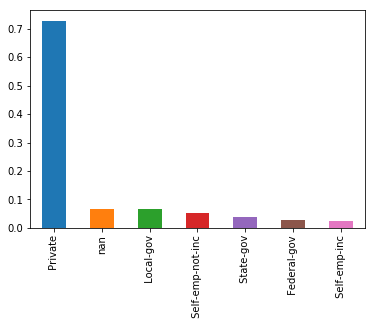

In [1601]:
 (data['workclass'].value_counts(dropna=False) / len(data)).plot(kind='bar')

In [1602]:
data['workclass'].value_counts()

 Private             1627
 Local-gov            146
 Self-emp-not-inc     117
 State-gov             86
 Federal-gov           61
 Self-emp-inc          53
Name: workclass, dtype: int64

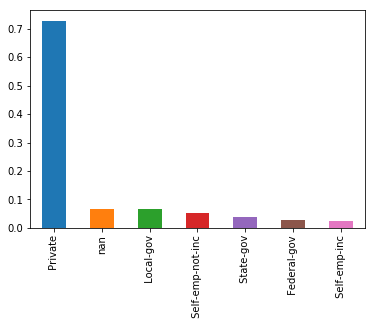

In [1603]:
(data['workclass'].value_counts(dropna=False) / len(data)).plot(kind='bar')

Mali sme 147 hodnoty NaN, ktoré sme nahradili novým atríbútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


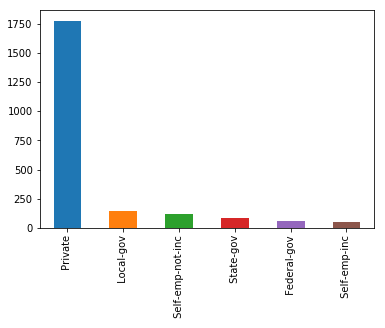

In [1604]:
array_workclass,knnworkclass= knn(data['workclass'],data['T3'])
data['workclass']=pd.DataFrame(array_workclass)
data['workclass'].value_counts(dropna=False).plot(kind='bar')

## Feature 'I131 treatment'

In [1605]:
data['I131 treatment'].value_counts(dropna=False)

f      2199
t        36
NaN       2
Name: I131 treatment, dtype: int64

Mali sme 2 hodnoty NaN, ktoré sme nahradili novým atríbútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


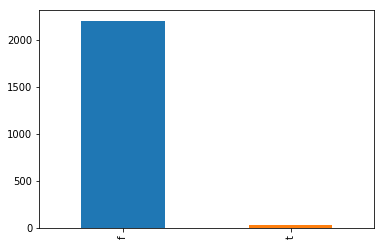

In [1606]:
array_I131_treatment,knnI131_treatment= knn(data['I131 treatment'],data['T3'])
data['I131 treatment']=pd.DataFrame(array_I131_treatment)
data['I131 treatment'].value_counts(dropna=False).plot(kind='bar')

## Feature 'class'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


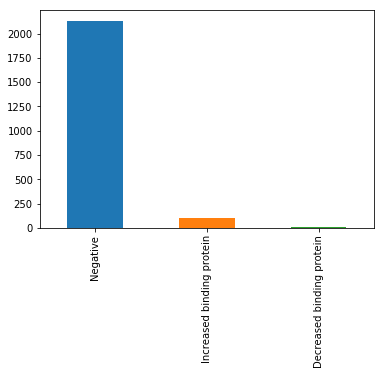

In [1607]:
array_class,knnclass= knn(data['class'],data['T3'])
data['class']=pd.DataFrame(array_class)
data['class'].value_counts(dropna=False).plot(kind='bar')

In [1608]:
data['class'].value_counts(dropna=False) 

Negative                     2131
Increased binding protein      97
Decreased binding protein       9
Name: class, dtype: int64

Mali sme 5 hodnôt NaN, ktoré sme nahradili novým atríbútom Unknown

## Feature 'marital-status'

In [1609]:
data['marital-status'].value_counts(dropna=False)

 Never-married            865
 Married-civ-spouse       672
 Divorced                 453
 Widowed                  108
 Separated                105
 Married-spouse-absent     29
NaN                         5
Name: marital-status, dtype: int64

Mali sme 5 hodnôt NaN, ktoré sme nahradili novým atríbútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


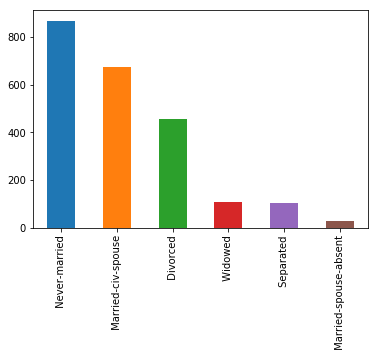

In [1610]:
array_marital_status,knnmarital_status= knn(data['marital-status'],data['T3'])
data['marital-status']=pd.DataFrame(array_marital_status)
data['marital-status'].value_counts(dropna=False).plot(kind='bar')

## Feature 'goitre'

In [1611]:
data['goitre'].value_counts(dropna=False)

f      2213
t        22
NaN       2
Name: goitre, dtype: int64

Mali sme 2 hodnoty NaN, ktoré sme nahradili novým atríbútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


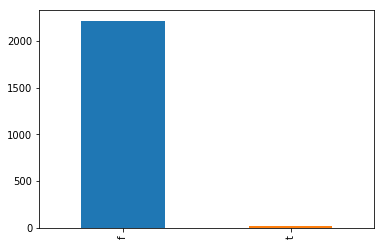

In [1612]:
array_goitre,knngoitre= knn(data['goitre'],data['T3'])
data['goitre']=pd.DataFrame(array_goitre)
data['goitre'].value_counts(dropna=False).plot(kind='bar')

## Feature 'native-country'

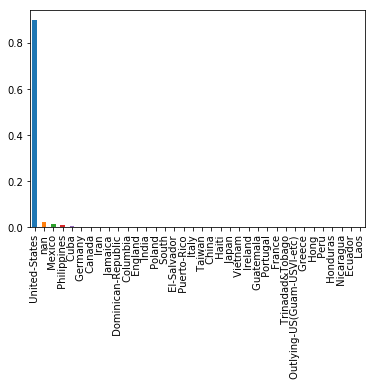

In [1613]:
(data['native-country'].value_counts(dropna=False) / len(data)).plot(kind='bar')

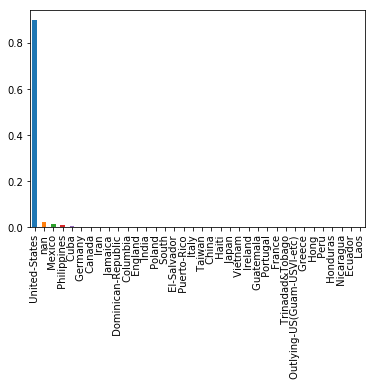

In [1614]:
(data['native-country'].value_counts(dropna=False) / len(data)).plot(kind='bar')

Nahradili sme všetky NaN novým atribútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


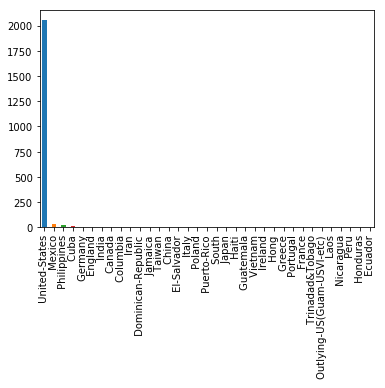

In [1615]:
array_native_country,knnnative_country= knn(data['native-country'],data['T3'])
data['native-country']=pd.DataFrame(array_native_country)
data['native-country'].value_counts(dropna=False).plot(kind='bar')

## Feature 'query on thyroxine'

In [1616]:
data['query on thyroxine'].value_counts(dropna=False)

f      2202
t        30
NaN       5
Name: query on thyroxine, dtype: int64

Nahradili sme všetky NaN novým atribútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


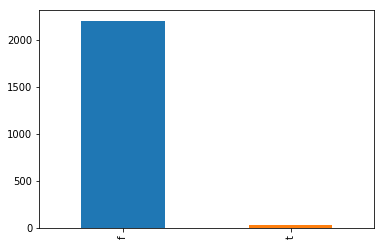

In [1617]:
array_query_on_thyroxine,knnquery_on_thyroxine= knn(data['query on thyroxine'],data['T3'])
data['query on thyroxine']=pd.DataFrame(array_query_on_thyroxine)
data['query on thyroxine'].value_counts(dropna=False).plot(kind='bar')

## Feature 'T3 measured'

In [1618]:
data['T3 measured'].value_counts(dropna=False)

t      1768
f       464
NaN       5
Name: T3 measured, dtype: int64

Nahradili sme všetky NaN novým atribútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


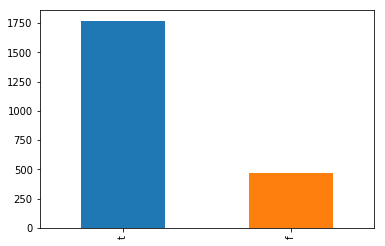

In [1619]:
array_T3_measured,knnT3_measured= knn(data['T3 measured'],data['T3'])
data['T3 measured']=pd.DataFrame(array_T3_measured)
data['T3 measured'].value_counts(dropna=False).plot(kind='bar')

## Feature 'referral source'

In [1620]:
data['referral source'].value_counts(dropna=False)

other    1299
SVI       629
SVHC      213
STMW       68
SVHD       25
NaN         3
Name: referral source, dtype: int64

Nahradili sme všetky NaN novým atribútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


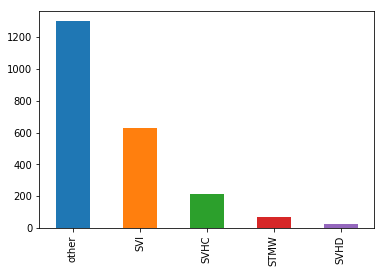

In [1621]:
array_referral_source,knnreferral_source= knn(data['referral source'],data['T3'])
data['referral source']=pd.DataFrame(array_referral_source)
data['referral source'].value_counts(dropna=False).plot(kind='bar')

## Feature 'education-num'

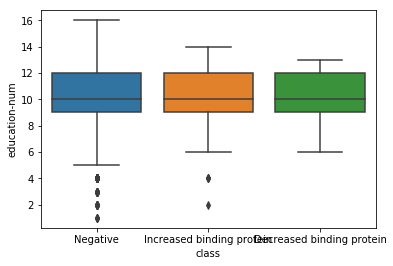

In [1622]:
sns.boxplot(x="class", y="education-num", data=data)

4


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


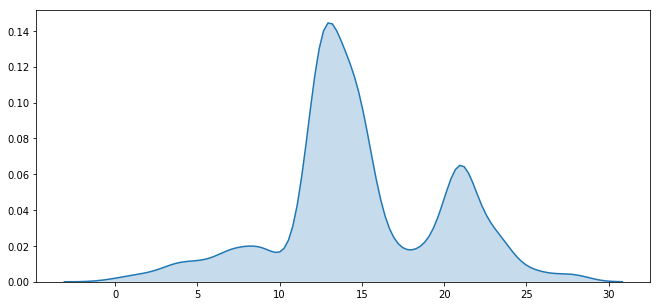

In [1623]:
transformed_en, array_en,atten = transformation('education-num')

14.678822691029733


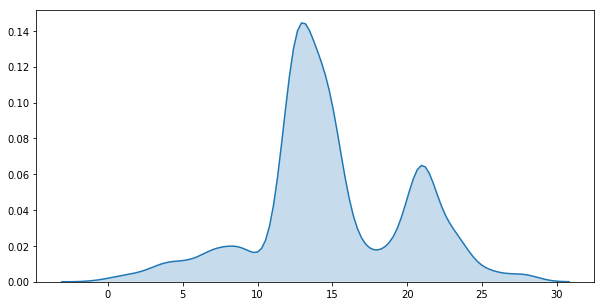

In [1624]:

array_en,median_en=vymenananmedian(transformed_en,array_en)

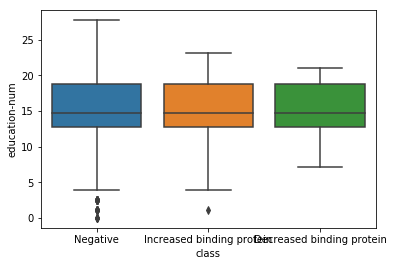

In [1625]:
data['education-num']=pd.DataFrame(array_en)
sns.boxplot(x="class", y="education-num", data=data)

In [1626]:
array_en,minen,maxen = percentily(array_en,5,94)

5.488165904189746
23.18700643522774


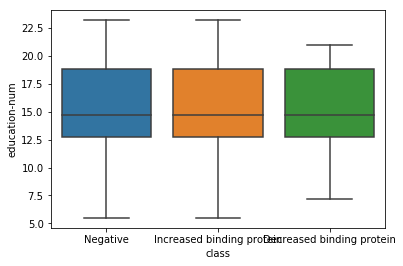

In [1627]:
data['education-num']=pd.DataFrame(array_en)
sns.boxplot(x="class", y="education-num", data=data)

Atribut nemá vplyv na class

## TODO:  Feature 'occupation'

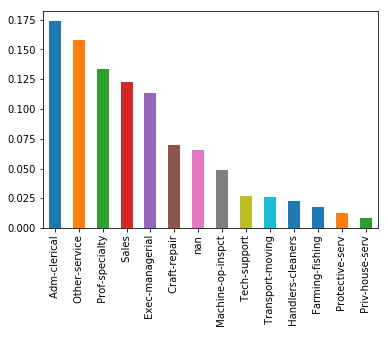

In [1628]:
 (data['occupation'].value_counts(dropna=False) / len(data)).plot(kind='bar')

In [1629]:
array_occupation,knnoccupation= knn(data['occupation'],data['T3'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


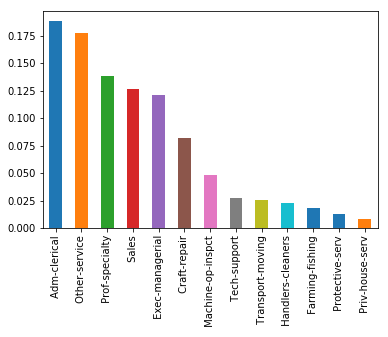

In [1630]:
r=pd.Series(array_occupation)
(r.value_counts(dropna=False) / len(r)).plot(kind='bar')

In [1631]:
data['occupation']=pd.DataFrame(array_occupation)

## Feature 'race'

In [1632]:
data['race'].value_counts(dropna=False)

 White                 1824
 Black                  292
 Asian-Pac-Islander      78
 Amer-Indian-Eskimo      21
 Other                   18
NaN                       4
Name: race, dtype: int64

Nahradili sme všetky NaN novým atribútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


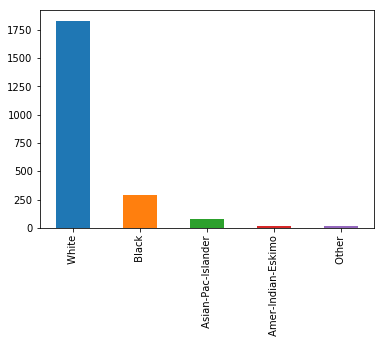

In [1633]:
array_race,knnrace= knn(data['race'],data['T3'])
data['race']=pd.DataFrame(array_race)
data['race'].value_counts(dropna=False).plot(kind='bar')

## Feature 'pregnant'

In [1634]:
data['pregnant'].value_counts(dropna=False)

f      2200
t        33
NaN       4
Name: pregnant, dtype: int64

Nahradili sme všetky NaN novým atribútom Unknown

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


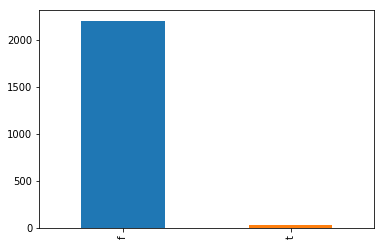

In [1635]:
array_pregnant,knnpregnant= knn(data['pregnant'],data['T3'])
data['pregnant']=pd.DataFrame(array_pregnant)
data['pregnant'].value_counts(dropna=False).plot(kind='bar')

## Feature 'T4U measured'

In [1636]:
data['T4U measured'].value_counts(dropna=False)

t      1952
f       232
NaN      53
Name: T4U measured, dtype: int64

Nahradili sme všetky NaN novým atribútom

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


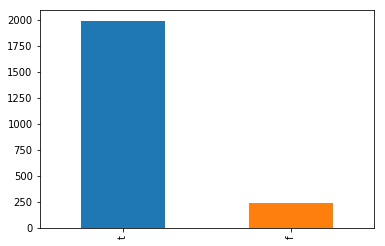

In [1637]:
array_T4U_measured,knnT4U_measured= knn(data['T4U measured'],data['T3'])
data['T4U measured']=pd.DataFrame(array_T4U_measured)
data['T4U measured'].value_counts(dropna=False).plot(kind='bar')

## Feature 'TSH measured'

In [1638]:
data['TSH measured'].value_counts(dropna=False)

t      1955
f       229
NaN      53
Name: TSH measured, dtype: int64

Nahradili sme všetky NaN novým atribútom

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


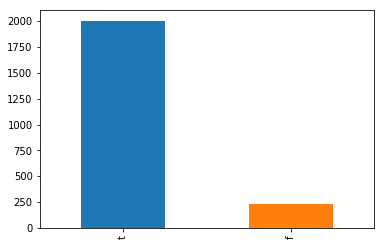

In [1639]:
array_TSH_measured,knnTSH_measured= knn(data['TSH measured'],data['T3'])
data['TSH measured']=pd.DataFrame(array_TSH_measured)
data['TSH measured'].value_counts(dropna=False).plot(kind='bar')

## Feature 'TT4 measured'

In [1640]:
data['TT4 measured'].value_counts(dropna=False)

t      2038
f       146
NaN      53
Name: TT4 measured, dtype: int64

Nahradili sme všetky NaN novým atribútom

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


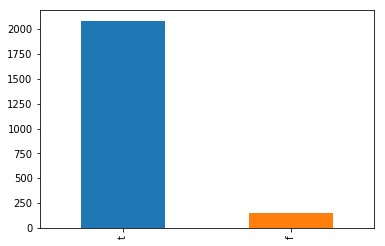

In [1641]:
array_TT4_measured,knnTT4_measured= knn(data['TT4 measured'],data['T3'])
data['TT4 measured']=pd.DataFrame(array_TT4_measured)
data['TT4 measured'].value_counts(dropna=False).plot(kind='bar')

## Feature 'on antithyroid medication'

In [1642]:
data['on antithyroid medication'].value_counts(dropna=False)

f      2157
NaN      53
t        27
Name: on antithyroid medication, dtype: int64

Nahradili sme všetky NaN novým atribútom

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


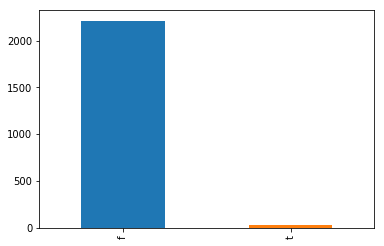

In [1643]:
array_on_antithyroid_medication,knnon_antithyroid_medication= knn(data['on antithyroid medication'],data['T3'])
data['on antithyroid medication']=pd.DataFrame(array_on_antithyroid_medication)
data['on antithyroid medication'].value_counts(dropna=False).plot(kind='bar')

## Feature 'psych'

In [1644]:
data['psych'].value_counts(dropna=False)

f      2079
t       105
NaN      53
Name: psych, dtype: int64

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


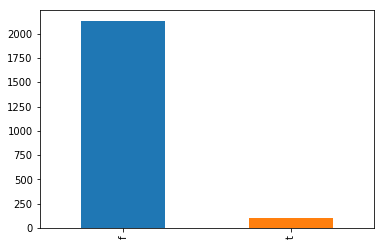

In [1645]:
array_psych,knnon_psych= knn(data['psych'],data['T3'])
data['psych']=pd.DataFrame(array_psych)
data['psych'].value_counts(dropna=False).plot(kind='bar')

Nahradili sme všetky NaN novým atribútom

## Feature 'query hyperthyroid'

In [1646]:
data['query hyperthyroid'].value_counts(dropna=False)

f      2051
t       133
NaN      53
Name: query hyperthyroid, dtype: int64

Nahradili sme všetky NaN novým atribútom

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


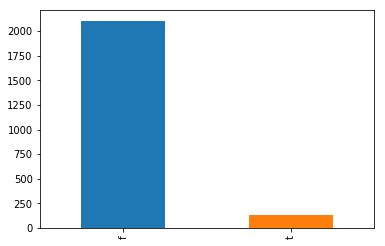

In [1647]:
array_query_hyperthyroid,knnquery_hyperthyroid= knn(data['query hyperthyroid'],data['T3'])
data['query hyperthyroid']=pd.DataFrame(array_query_hyperthyroid)
data['query hyperthyroid'].value_counts(dropna=False).plot(kind='bar')

## Feature 'query hypothyroid'

In [1648]:
data['query hypothyroid'].value_counts(dropna=False)

f      2053
t       131
NaN      53
Name: query hypothyroid, dtype: int64

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


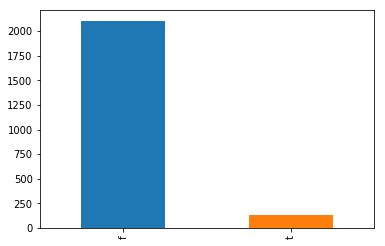

In [1649]:
array_query_hypothyroid,knnquery_hypothyroid= knn(data['query hypothyroid'],data['T3'])
data['query hypothyroid']=pd.DataFrame(array_query_hypothyroid)
data['query hypothyroid'].value_counts(dropna=False).plot(kind='bar')

## Feature 'sick'

In [1650]:
data['sick'].value_counts(dropna=False)

f      2099
t        85
NaN      53
Name: sick, dtype: int64

Nahradili sme všetky NaN novým atribútom

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


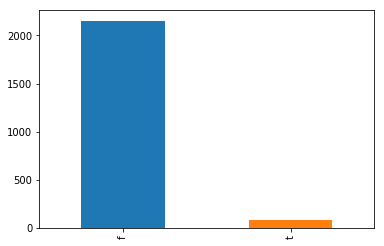

In [1651]:
array_sick,knnsick= knn(data['sick'],data['T3'])
data['sick']=pd.DataFrame(array_sick)
data['sick'].value_counts(dropna=False).plot(kind='bar')

In [1652]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 42 columns):
name                         2237 non-null object
address                      2237 non-null object
FTI measured                 2237 non-null object
education                    2237 non-null object
lithium                      2237 non-null object
TT4                          2237 non-null float64
T4U                          2237 non-null float64
capital-loss                 2237 non-null float64
capital-gain                 2237 non-null float64
on thyroxine                 2237 non-null object
tumor                        2237 non-null object
TSH                          2237 non-null float64
T3                           2237 non-null float64
fnlwgt                       2237 non-null float64
hours-per-week               2237 non-null float64
relationship                 2237 non-null object
thyroid surgery              2237 non-null object
workclass                    2237 n

# Korelácia dát po spracovaní

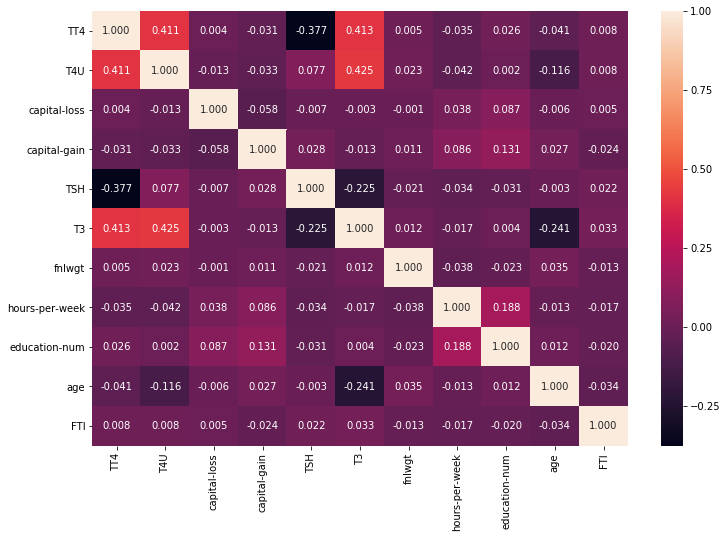

In [1653]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")

Po úpravach v dátach sa korelačný graf upravil. Pre nás je najzaujímavejšia skupina atribútov TT4,T4U,TSH,T3. Korelácie medzi atribútmi TT4 - T3, TT4 - T4U, T3 - T4U, sa zoslabili naopak  TT4 - TSH, T3 - TSH sa zosilnili.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


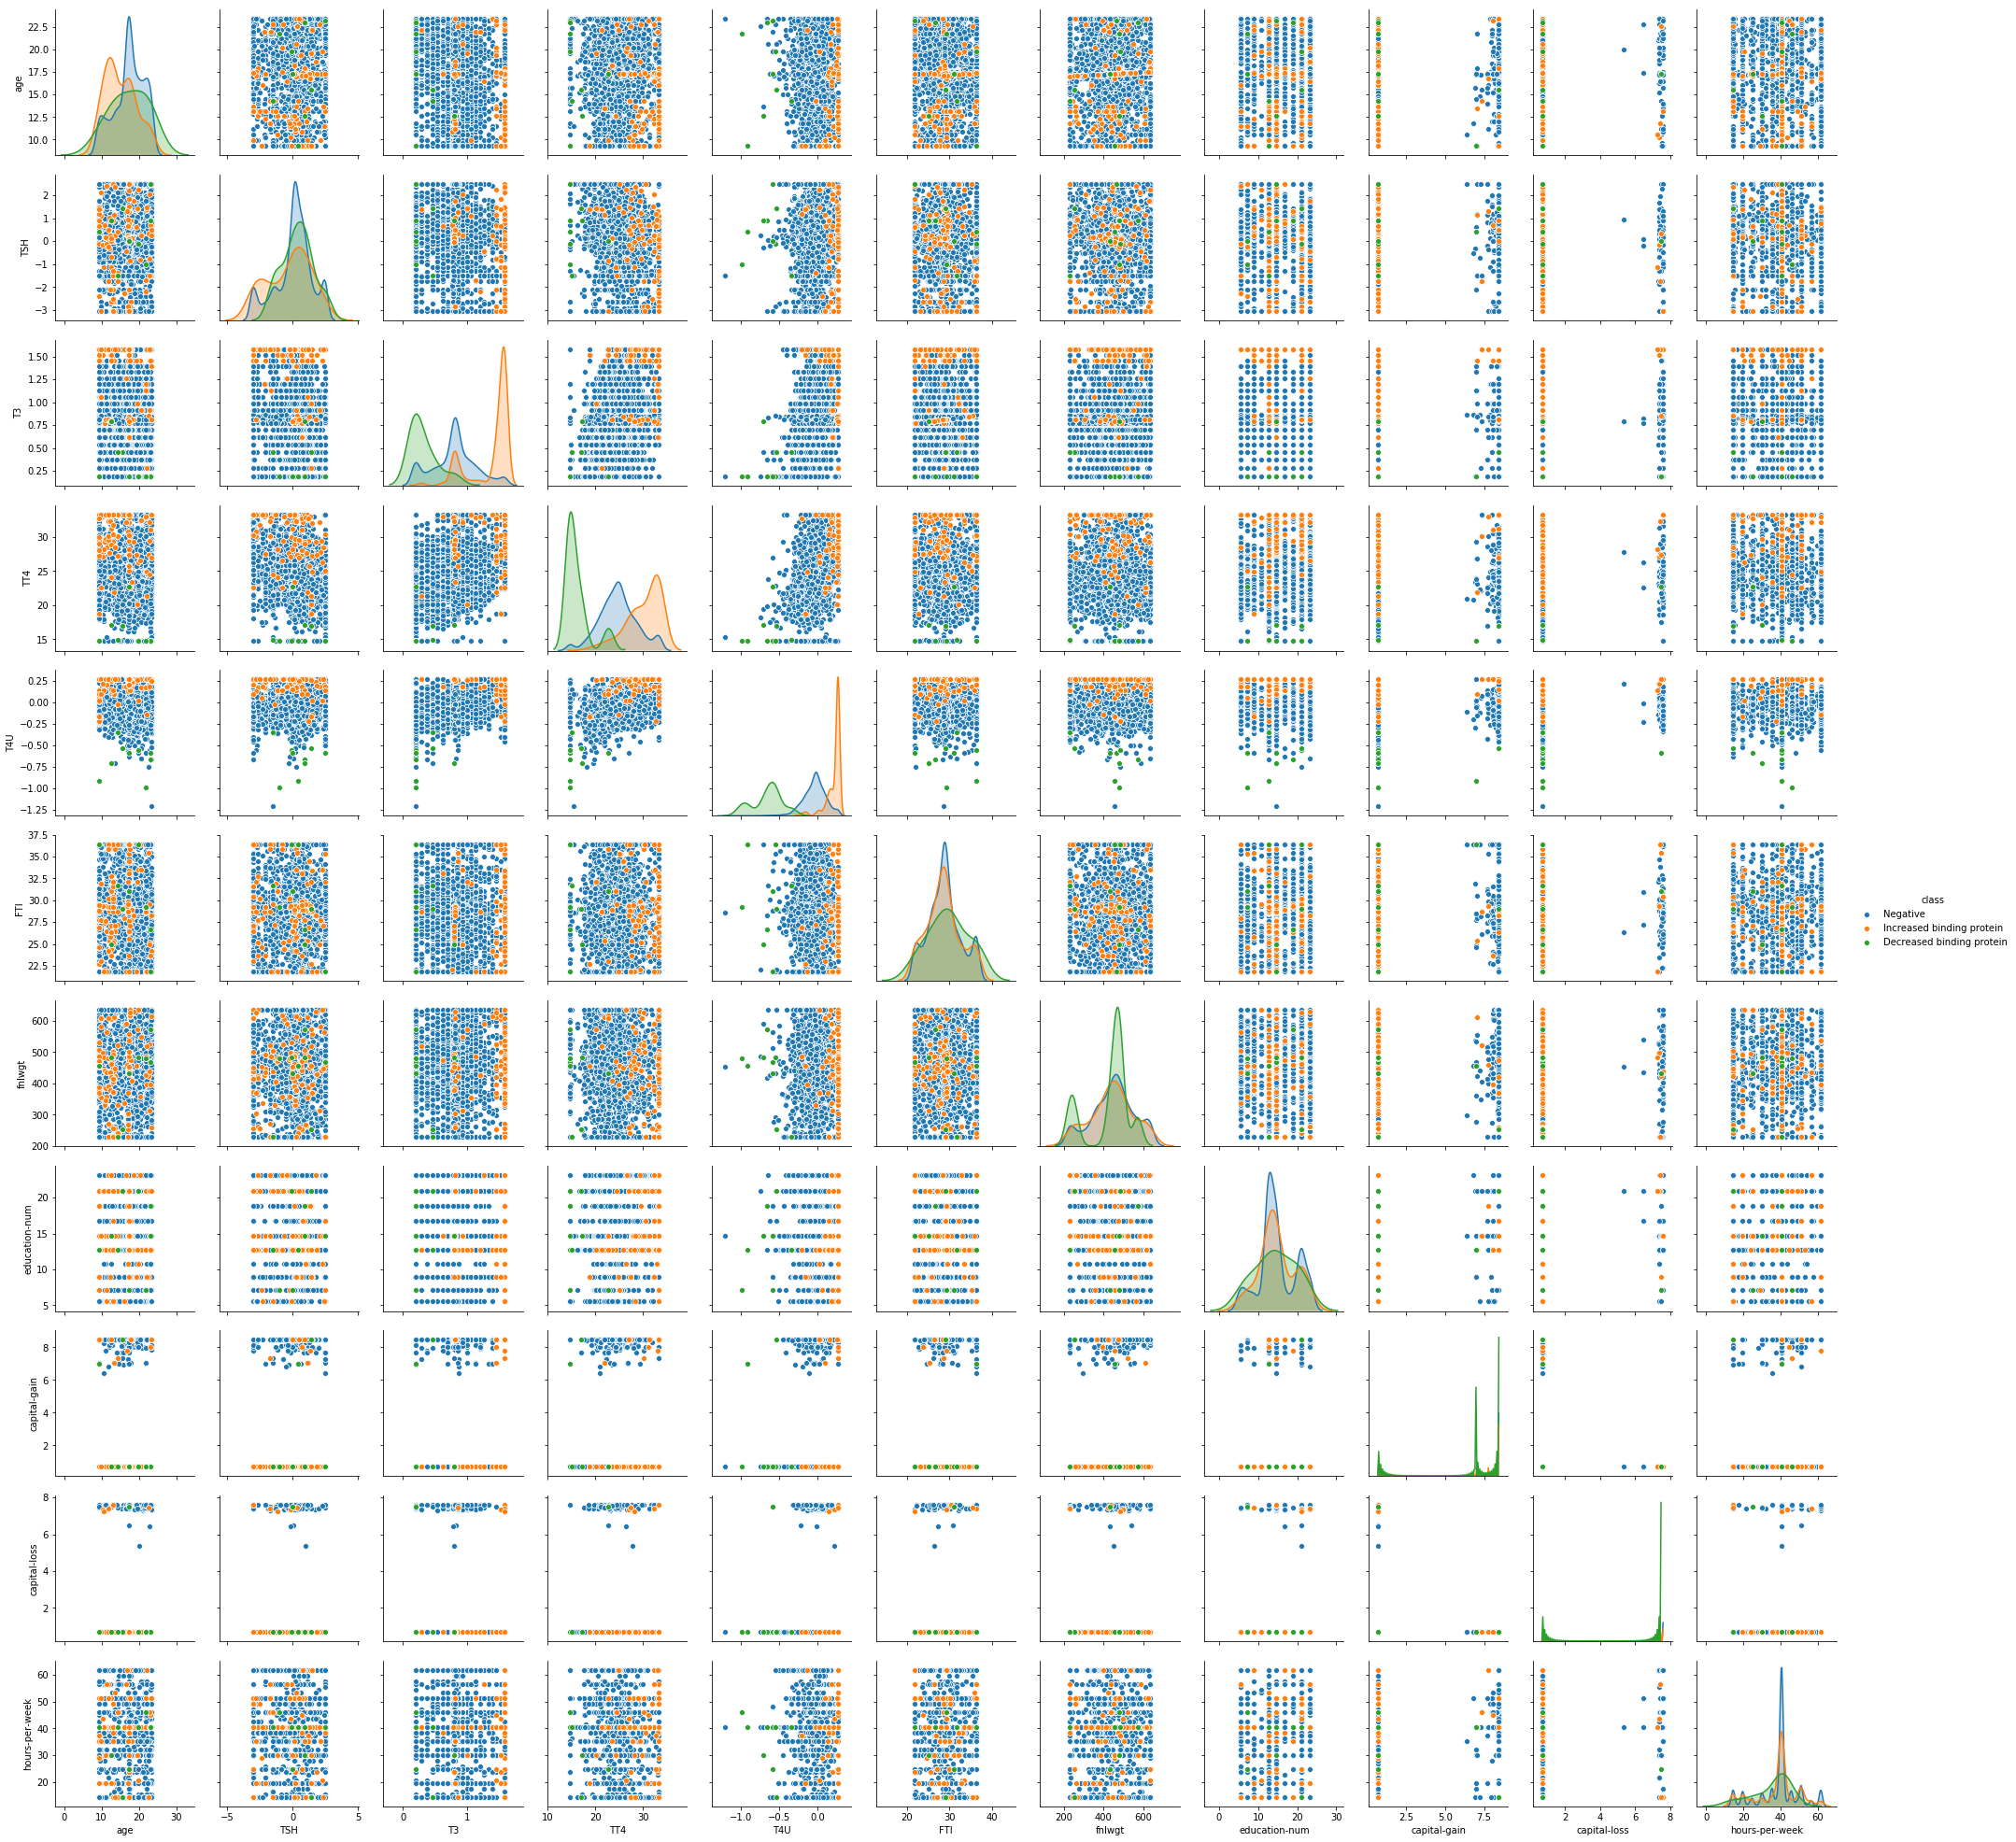

In [1654]:
_ = sns.pairplot(data[['class','age','TSH','T3','TT4','T4U','FTI','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].dropna(), hue='class')

Z pairplotu sa dá vyčítať, že vo viacerých atribútoch sme napravili odhľahlé hodnoty. Na základe pozorovaní grafov sme zistili že niektoré grafy sa nedajú rozdeliť do zhlukov.

# Vytvorenie a vyhodnotenie pravidiel pre klasifikáciu

## Tvorba pravidiel

TT4                      
                                mean        min        max
class                                                     
Decreased binding protein  16.145585  14.702229  22.771262
Increased binding protein  30.153138  18.771287  33.342881
Negative                   24.763312  14.702229  33.342881

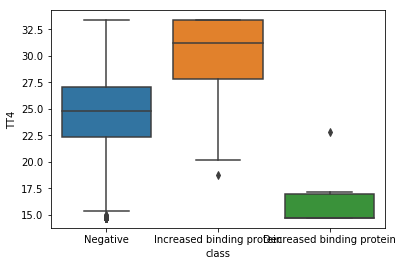

In [1655]:
sns.boxplot(x="class", y="TT4", data=data)
d2= data[['class','TT4']]
d2 = d2.groupby('class').aggregate(['mean','min','max'])
d2

age                     
                                mean       min        max
class                                                    
Decreased binding protein  17.397264  9.285875  23.170573
Increased binding protein  15.076190  9.285875  23.373761
Negative                   17.425441  9.285875  23.373761

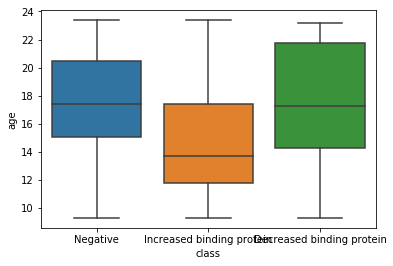

In [1656]:
sns.boxplot(x="class", y="age", data=data)
d2= data[['class','age']]
d2 = d2.groupby('class').aggregate(['mean','min','max'])
d2

T3                    
                               mean       min       max
class                                                  
Decreased binding protein  0.316578  0.191941  0.787312
Increased binding protein  1.376249  0.282590  1.578491
Negative                   0.799549  0.191941  1.578491

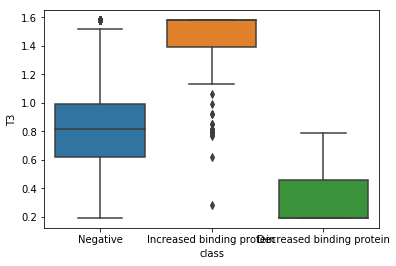

In [1657]:
sns.boxplot(x="class", y="T3", data=data)
d2= data[['class','T3']]
d2 = d2.groupby('class').aggregate(['mean','min','max'])
d2

T4U                    
                               mean       min       max
class                                                  
Decreased binding protein -0.654083 -0.992468 -0.345574
Increased binding protein  0.217809 -0.211886  0.268131
Negative                  -0.037469 -1.207772  0.268131

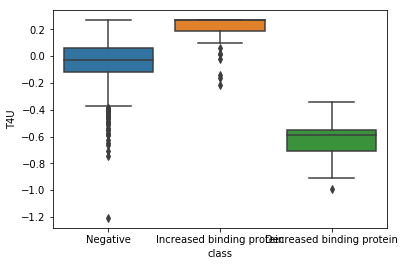

In [1658]:
sns.boxplot(x="class", y="T4U", data=data)
d2 = data[['class','T4U']]
d2 = d2.groupby('class').aggregate(['mean','min','max'])
d2

hours-per-week                      
                                    mean        min        max
class                                                         
Decreased binding protein      35.333722  14.384501  45.851758
Increased binding protein      38.333880  14.384501  61.720434
Negative                       39.121778  14.384501  61.720434

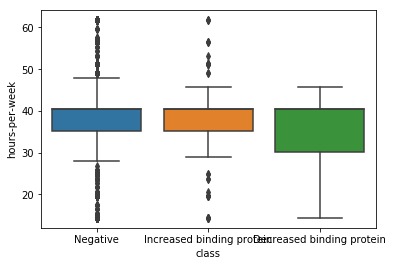

In [1659]:
sns.boxplot(x="class", y="hours-per-week", data=data)
d3 = data[['class','hours-per-week']]
d3 = d3.groupby('class').aggregate(['mean','min','max'])
d3

TSH                    
                               mean       min       max
class                                                  
Decreased binding protein  0.389269 -1.508529  2.479166
Increased binding protein -0.281702 -3.050766  2.479166
Negative                   0.095252 -3.050766  2.479166

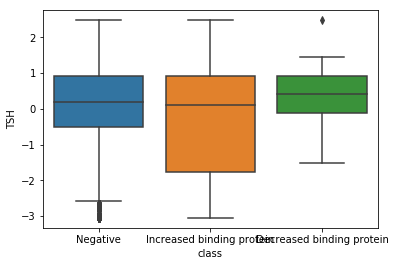

In [1660]:
sns.boxplot(x="class", y="TSH", data=data)
d = data[['class','TSH']]
d = d.groupby('class').aggregate(['mean','min','max'])
d

In [1661]:
df= data[['class','TT4','T4U','hours-per-week','TSH','T3','age']]
df = df.groupby('class').aggregate(['mean','min','max'])
df

TT4                             T4U  \
                                mean        min        max      mean   
class                                                                  
Decreased binding protein  16.145585  14.702229  22.771262 -0.654083   
Increased binding protein  30.153138  18.771287  33.342881  0.217809   
Negative                   24.763312  14.702229  33.342881 -0.037469   

                                              hours-per-week             \
                                min       max           mean        min   
class                                                                     
Decreased binding protein -0.992468 -0.345574      35.333722  14.384501   
Increased binding protein -0.211886  0.268131      38.333880  14.384501   
Negative                  -1.207772  0.268131      39.121778  14.384501   

                                           TSH                            T3  \
                                 max      mean       min       max      mean   
class                                                                          
Decreased binding protein  45.851758  0.389269 -1.508529  2.479166  0.316578   
Increased binding protein  61.720434 -0.281702 -3.050766  2.479166  1.376249   
Negative                   61.720434  0.095252 -3.050766  2.479166  0.799549   

                                                     age                       
                                min       max       mean       min        max  
class                                                                          
Decreased binding protein  0.191941  0.787312  17.397264  9.285875  23.170573  
Increased binding protein  0.282590  1.578491  15.076190  9.285875  23.373761  
Negative                   0.191941  1.578491  17.425441  9.285875  23.373761

In [1662]:
pd.set_option('display.max_columns',100)
data.groupby('class').describe()

FTI                                             \
                            count       mean       std        min        25%   
class                                                                          
Decreased binding protein     9.0  29.696491  4.858205  21.845383  26.679266   
Increased binding protein    97.0  28.661209  4.005005  21.845383  26.311110   
Negative                   2131.0  28.863513  3.803250  21.845383  26.311110   

                                                                T3            \
                                 50%        75%        max   count      mean   
class                                                                          
Decreased binding protein  29.181933  31.736569  36.375936     9.0  0.316578   
Increased binding protein  28.655991  30.389058  36.375936    97.0  1.376249   
Negative                   28.831900  30.898229  36.375936  2131.0  0.799549   

                                                                             \
                                std       min       25%       50%       75%   
class                                                                         
Decreased binding protein  0.210114  0.191941  0.191941  0.191941  0.455120   
Increased binding protein  0.318762  0.282590  1.392205  1.578491  1.578491   
Negative                   0.340657  0.191941  0.617768  0.812395  0.990936   

                                        T4U                                \
                                max   count      mean       std       min   
class                                                                       
Decreased binding protein  0.787312     9.0 -0.654083  0.197616 -0.992468   
Increased binding protein  1.578491    97.0  0.217809  0.095726 -0.211886   
Negative                   1.578491  2131.0 -0.037469  0.146685 -1.207772   

                                                                      TSH  \
                                25%       50%       75%       max   count   
class                                                                       
Decreased binding protein -0.705856 -0.588694 -0.552556 -0.345574     9.0   
Increased binding protein  0.189674  0.268131  0.268131  0.268131    97.0   
Negative                  -0.116889 -0.025017  0.058180  0.268131  2131.0   

                                                                             \
                               mean       std       min       25%       50%   
class                                                                         
Decreased binding protein  0.389269  1.223455 -1.508529 -0.127171  0.412226   
Increased binding protein -0.281702  1.643146 -3.050766 -1.757976  0.119948   
Negative                   0.095252  1.387888 -3.050766 -0.500357  0.203756   

                                                  TT4                       \
                                75%       max   count       mean       std   
class                                                                        
Decreased binding protein  0.907398  2.479166     9.0  16.145585  2.676096   
Increased binding protein  0.907398  2.479166    97.0  30.153138  3.573786   
Negative                   0.907398  2.479166  2131.0  24.763312  3.939973   

                                                                       \
                                 min        25%        50%        75%   
class                                                                   
Decreased binding protein  14.702229  14.702229  14.702229  16.936287   
Increased binding protein  18.771287  27.764782  31.216348  33.342881   
Negative                   14.702229  22.296905  24.757528  27.068661   

                                         age                                 \
                                 max   count       mean       std       min   
class                                                                         
Decreased binding protein  22.771262     9.0  1

# Asociácia

## Manuálne vytváranie pravidiel 

In [1663]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [1664]:
datatrue=pd.DataFrame(data['class'])
datatrue.columns=['true']

In [1665]:
data['class'].value_counts()

Negative                     2131
Increased binding protein      97
Decreased binding protein       9
Name: class, dtype: int64

In [1666]:
datapredicted = pd.DataFrame('negative', index=np.arange(2237), columns=['class-predict'])
datapredicted.loc[datapredicted['class-predict'].str.contains('negative') & (data['TT4']>28) & (data['T4U']>0.1) & (data['T3']>1.1) & (data['TSH']<1),'class-predict'] ='Increased binding protein'
datapredicted.loc[datapredicted['class-predict'].str.contains('negative') & (data['TT4']<20) & (data['T3']<0.5) &(data['TT4']>-0.5) & (data['age']>14),'class-predict'] ='Decreased binding protein'
datapredicted['class-predict'].value_counts()

negative                     2034
Increased binding protein     106
Decreased binding protein      97
Name: class-predict, dtype: int64

In [1667]:
print("accuracy:",accuracy_score(datatrue, datapredicted))
print("precision:",precision_score(np.array(datatrue), np.array(datapredicted),labels=['negative','Increased binding protein','Decreased binding protein'],average=None))
print("recall:",recall_score(datatrue, datapredicted,labels=['negative','Increased binding protein','Decreased binding protein'],average=None))
print("f1 score:",f1_score(datatrue, datapredicted,labels=['negative','Increased binding protein','Decreased binding protein'],average=None))

accuracy: 0.024139472507822977
precision: [0.         0.45283019 0.06185567]
recall: [0.         0.49484536 0.66666667]
f1 score: [0.         0.4729064  0.11320755]


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Testovanie pravidiel 

# Záver

## Predspracovanie údajov

V numerických atribútoch sme sa pozreli na distribúciu atribútu pred transformáciou. Vykonali sme transformáciou pomocou boxcox. V atribútoch capital-gain,capital-loss sme používali logaritmickú transformáciou. Po transformácií sme zisťovali, či má atribút chýbajúce hodnoty. Tieto sme nahradzovali 3 technikami a to lineárnou regresiou, mediánom, a mediánom segmentu. Odhľahlé hodnoty sme riešili nahradením pomocou hraničných percentilov. Ďalej sme zmenené distribúcie a boxploty vykreslovali na overenie nášho postupu riešenia. Distribúcie atribútov sa zmenili na normálne. V atribútoch, ktoré ukazovali vyššiu mieru korelácie už v prvej časti projektu(TT4,T4U,FTI) sme použili sofistikovanejšiu metódu nahradzovania chýbajúcich hodnôt lineánu regresiu. Na trénovanie sme použili len 1 atribút. Princíp nahradzovania sme sa snažili v ostatných atribútoch striedať(výmena mediánom a mediánom segmentu). Na výmenu chýbajúcich hodnôt v kategorických atribútoch sme použili KNN.
Pri transformáciách sme z metód vracali aj atribúty(koeficienty) ako sa robili transformácie. Rovnaké koeficienty sa použili aj pri tranformácií na testovacom datasete.  

## Korelácia

Skupina číselných atribútov T3, TT4, T4U a FTI je pre nás najzaujímavejšia. Po vykonaní transformácie sa korelácie medzi nimi upravili. Korelácie medzi atribútmi TT4 - T3, T3-FTI, T4U - T3, FTI - TT4 sa zosilnili, naopak kombinácie T4U - TT4, FTI - T3 sa zoslabili.
Pridané atribúty ako capital gain, capital loss, hours per week a education majú o čosi vyššiu koreláciu. Na vplyv do ktorej triedy pacienti patria to však nemá a preto sme ich ani v asociačných pravidlách neuvažovali. Predikované triedy teda určite závisia od hodnôt T3, TT4, T4U, FTI a fnlwgt.

## Pravidlá klasifikácie 

V sekcií vytvorenie pravidiel sme sa pozreli priemerné hodnoty atribútov T3, TT4, T4U, FTI, TSH, fnlwgt vo vzťahu k triede kam pacienti patria. Z nich sme vytvorili asociačné pravidlá. Na vytvorenie pravidiel sme vytvorili pravidlá, ktoré boli komplikovanejšie a zahŕňali viaceré atribúty.
Postupovali sme tak, že všetkým pacientom sme nastavili triedu na negative a snažili sme sa trafiť ostatné triedy. Presnosť pravidiel sme overili pomocou 4 metrík a to accuracy, precision, recall a f1 score. Keď sme si vypísali počty pacientov po triedach v skutočnosti a nami predikovanými, tak počet osôb v jednotlivých triedach bol približne rovnaký. V testovacích dáta sa nenáchadzal nikto, kto by mal identifikovanú chorobu secondary. Metrika accuracy na testovacej a trénovacej sade je približne 0.94. V predikovaní secondary hypothyroid máme 50 % úspešnosť, takže z 2 ľudí sme trafili 1. 
Relatívne vysoké percentá sme mali v predikovaní triedy compensated hypothyroid. V triede primary, nám pravdepodobne nejaká skutočnosť uniká, tam máme vysoký precision ale nízky recall a f1 score. 